Mateus Soares and Rodrigo Toledo Notebook about: PPBIO-OPTICAL-MODEL

mateus.soares.ee.ufcg.edu.br, rodrigo.araujo@ee.ufcg.edu.br

# 0. Imports

In [63]:
from numpy import *
from numpy import pi as π
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interactive
import plotly.graph_objects as go
import numpy as np
import jax.numpy as jnp
import jax

In [64]:
import seaborn as sns
colors = sns.color_palette("tab10")
# Set scientific-style plotting parameters
plt.rcParams["text.usetex"] = True  # Use LaTeX for text rendering
plt.rcParams["font.family"] = "serif"
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = "dotted"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 10

# Define colors for the angle and velocity plots
colors = sns.color_palette("tab10")

# 1. Ideal case: astigmatic gaussian beam

## 1.1. Mathematical formulation for the gaussian beam

Consideremos que a fonte de luz seja um laser com um único modo transversal que se propaga como ondas paraxiais (ou seja, cujas normais às frentes de onda sejam raios paraxiais), mais especificamente do tipo **feixe gaussiano**.

### 1.1.1 Conceito de raios paraxiais

Em meios isotrópicos,raios ópticos apontam na direção do fluxo de energia óptica. Um conjunto de raios pode ser construído no qual a densidade de raios é proporcional a densidade energia luminosa. Raios podem ser traçados através de um sistema óptico para se determinar a energia óptica atravessando uma dada área. Componentes ópticos são comumente alinhados com um eixo óptico, em torno do qual os raios viajam com inclinações pequenas. Tais raios são chamados **raios paraxiais**. O conceito de raios advém da óptica geométrica, do qual relembraremos um dos postulados, conhecido como **princípio de Fermat**:

"A luz viaja ao longo do caminho de menor tempo"

matematicamente expresso como

\begin{equation}
\delta\int_A^B n(\mathbf{r}) ds = 0
\end{equation}

sendo $n$ o índice de refração na posição $\mathbf r$ (razão entre a velocidade da luz no vácuo e a velocidade da luz no meio) e $ds$ um elemento diferencial de comprimento ao longo do caminho de porpagação, de forma que a integral representa o caminho óptico (o tempo que a luz leva para viajar uma distância $d$ é $d/c = nd/c_o$. O produto $nd$ é conhecido como caminho óptico).

As trajetórias dos raios são caracterizadas pelas superfícies às quais eles são normais. Seja $S(\mathbf{r})$ uma função potencial cujas superfícies equipotenciais $S(\mathbf{r})=\text{constante}$ são normais aos raios em qualquer ponto $\mathbf{r}$ do espaço. Se a função $S(\mathbf{r})$ é conhecida, as trajetórias dos raios podem ser construídas uma vez que a normal as superfícies equipotenciais em uma posição $\mathbf{r}$ está na direção do vetor gradiente $\vec{∇}S$. A função $S(\mathbf{r})$ é chamada de **eikonal**, similar a função potencial $V(\mathbf{r})$, em eletrostática, onde os raios ópticos fazem o papel do campo elétrico $\mathbf E=-\vec∇$.

Para satisfazer o princípio de Fermat, a eikonal $S(\mathbf r)$ precisa satisfazer uma equação diferencial parcial conhecida como **equação eikonal**

\begin{equation}
\left(\frac{\partial S}{\partial x}\right)^2 + \left(\frac{\partial S}{\partial y}\right)^2 + \left(\frac{\partial S}{\partial z}\right)^2 = n^2
\end{equation}

que usualmente é escrita na forma vetorial:

\begin{equation}
|\vec\nabla S|^2 = n^2
\end{equation}

onde $|\vec\nabla S|^2 = \vec\nabla S\cdot\vec\nabla S$. A prova matemática dessa equação não será apresentada aqui.

*Uma onda é dita paraxial quando as normais às suas frentes de onda são raios paraxiais, ou seja, o campo potencial cujas superfícies equipotenciais descrevem superfícies de mesma fase é uma eikonal. Dessa forma, a direção dos raios é paralela ao vetor gradiente da fase".

Um jeito de se construir uma onda paraxial é começar comm uma onda plana $A\exp(-jkz)$ (usando da representação fasorial de ondas - no caso trata-se de uma onda plana propagando-se na direção $z$) e modular seu envelope complexo como uma função que varia lentamente com a posição no espaço $A(\mathbf r)$, portanto

\begin{equation}
U(\mathbf r) = A(\mathbf r)\exp(-jkz)
\end{equation}

A variação de $A(\mathbf r)$ e sua derivada com a posição z precisam variar lentamente dentro da distância de um comprimento de onda para que a onda mantenha sua característica de onda plana.

Para que a onda paraxial satisfaça a equação de Helmholtz $∇^2U + k^2U=0$, o envelope complexo $A(\mathbf r)$ precisa satisfazer outra equação obtida da substituição da nova expressão de $U$ na equação de Helmholtz. Assumindo-se que $A(\mathbf r)$ varia lentamente com relação a $z$ significa que dentro de uma distância $\Delta << \lambda$, a variação $\Delta A$ é muito menor que $A$ em si $\Delta A << A$. Esta inegualdade de variáveis complexas apelica-se as magnitudes das partes reais e imaginárias separadamente. Uma vez que $\Delta A = (\partial A/\partial z)\Delta z = (\partial A/\partial z) \lambda$, $\partial A/\partial z << A/\lambda  = A k /2\pi$ de modo que

\begin{equation}
\frac{\partial A}{\partial z} << kA
\end{equation}

A derivada $\partial A/\partial z$ em si precisa variar lentmente dentro de uma distância λ, de forma que $\partial ^2 A/\partial z^2 << k\partial A/\partial z$, o que resulta em

\begin{equation}
\frac{\partial^2A}{\partial z^2}<< k^2 A
\end{equation}

Fazendo a substituição de $U$ na equação de Helmholtz e ignorando os temos $\partial^2 A/\partial z^2$ com relação a $k\partial A/\partial z$ ou $k^2 A$, se chega a uma equação diferencial para o envelope complexo $A(\mathbf r)$:

\begin{equation}
∇_T^2 A - j2k\frac{\partial A}{\partial z} = 0
\end{equation}

onde $\partial_T^2 = \partial^2/\partial x^2 + \partial^2/\partial y^2$ é o operador Laplaciano transversal. A equalção acima é a **equação de Hemholtz paraxial**. A solução mais simples para essa equação é a onda paraboloide, que é uma aproximação paraxial de uma onda esférica. Uma outra solução é o **feixe Gaussiano**.

### 1.1.2 O feixe Gaussiano

O feixe Gaussiano é uma importante solução da equação de Helmholtz paraxial que exibe características de um feixe óptico. A potência do feixe é principalmente concentrado dentro de um pequeno cilindro que envolve o eixo de feixe. A distribuição de intensidade em qualquer plano transversal é uma função gaussiana de simetria circular centrada em torno do eixo do feixe. A largura dessa função é mínima na cintura do feixe (foco) e se torna graualmente maior a medida que se distancia dessa cintura em ambas as direções do eixo do feixe. As frentes de onda são aproximadamente planas nas proximidades do foco, se curvam gradualmente à medida que se afasta dele e, em maiores distâncias do foco se tornam aproximadamente esféricas. A divergência angular das normais à frente de onda assumem o menor valor permitido pela equação de onda de uma dada largura de feixe. A luz da maioria dos tipos de laser assumem a forma de um feixe gaussiano.

Como mencionado, o feixe Gaussiano é um tipo de onda paraxial. Uma onda paraxial é uma onda plana viaajando ao longo da direção $z$ ($e^{-jkz}$) (com número de onda $k=2\pi/\lambda$ e comprimento de onda $\lambda$), modulado por um envelope complexo $A(\mathbf r)$ que é uma função que varia lentamente com a posição, de forma que sua amplitude complexa é dada por

\begin{equation}
U(\mathbf r)=A(\mathbf r) \exp(-jkz)
\end{equation}

O envelope é tido como aproximadamente constante dentro de uma vizinhança de tamanho $\lambda$, de forma que a onda mantém localmente sua característica de onda plana enquanto exibe normais às frentes de onda que são raios paraxiais.

Para que a amplitude complexa $U(\mathbf r)$ satisfaça a equação de Helmholtz $\nabla^2U + k^2U = 0$, o envelope complexo $A(\mathbf r)$ precisa satisfazer a equação de Helmholtz paraxial

\begin{equation}
\nabla_T^2 A - j2k \frac{\partial A}{\partial z} = 0
\end{equation}

onde $\nabla_T^2=\partial^2/\partial x^2 +\partial ^2/\partial y^2$ é o operador Laplaciano transversal. Uma solução simples para a equação de Helmholtz paraxial é a onda paraboloidal, para a qual

\begin{equation}
A(\mathbf r) = \frac{A_1}{z}\exp\left(-jk\frac{\rho^2}{2z}\right),\space \rho^2=x^2 + y^2
\end{equation}

onde $A_1$ é uma constante.  A onda paraboloidal é uma aproximação paraxial da onda esférica $U(\mathbf r) =  (A_1/r)exp(-jkr)$ quando $x$ e $y$ são muito menores que $z$.

Outra solução da equação de Helmholtz paraxial leva ao feixe Gaussiano. Esta é obitida da onda paraboloidal  pelo uso de uma simples transformação. Uma vez que o envelope complexo da onda paraboloidal é uma solução da eequação de Helmholtz paraxial, também o será uma versão espacialmente deslocada desta, com $z-ξ$ substituindo $z$ onde $ξ$ é uma constante.

\begin{equation}
A(\mathbf r) = \frac{A_1}{q(z)}\exp\left[-jk\frac{\rho^2}{2q(z)}\right],\space q(z) = z-ξ
\end{equation}

Essa solução representa uma onda parabooidal centrada em torno do ponto $z=ξ$ ao invés de $z=0$. A equação acima ainda é uma solução válida mesmo para um $\xi$ complexo, mas a solução adiquire propriedades drasticamente diferentes. Em particular, quando $\xi$ é puramente imaginário, digamos $\xi=-jz_0$ onde $z_0$ é real, a equação apresentada leva ao envelope complexo do feixe Gaussiano

\begin{equation}
A(\mathbf r) = \frac{A_1}{q(z)}\exp\left[-jk\frac{\rho^2}{2q(z)}\right],\space q(z) = z + jz_0
\end{equation}

A quantidade $q(z)$ é chamada de **parâmetro q** do feixe e o parâmetro $z_0$ é conhecido como **alcance de Rayleigh**.

Para separar a amplitude e fase desse envelope complexo, escrevemos a função complexa $1/q(z) = 1/(z+jz_0)$ em termos de suas partes reais e imaginárias definindo-se duas novaz funções reais, $R(z)$ e $W(z)$, de forma que

\begin{equation}
\frac{1}{q(z)} = \frac{1}{R(z)} - j\frac{\lambda}{\pi W^2(z)}
\end{equation}

Substituindo essa expressão no envelope complexo e depois substituindo o envelope complexo na amplitude complexa se chega a

\begin{equation}
U(\mathbf r) = A_0\frac{W_0}{W(z)}\exp\left[-\frac{\rho^2}{W^2(z)}\right]\exp\left[-jkz - jk\frac{\rho^2}{2R(z)} + j\zeta(z)\right]
\end{equation}

sendo

\begin{gather}
W(z) = W_0\sqrt{1 + \left(\frac{z}{z_0}\right)^2}\\
R(z) = z\left[1 + \left(\frac{z_0}{z}\right)^2\right]\\
\zeta(z) = \arctan\frac{z}{z_0}\\
W_0 = \sqrt{\frac{\lambda z_0}{\pi}}
\end{gather}

Uma nova constante $A_0 = A_1/jz_0$ foi adicionada por conveniência.  $W(z)$ é a largura do feixe, $R(z)$ é a curvatura da frente de onda. $W_0$ é a largura do feixe em sua cintura (foco), e $\zeta(z)$ é o excesso de fase de atraso acumulada associada ao **efeito Gouy**. Um parâmetro importante que pode ser obtido das expressões apresentadas é a diverg~encia do feixe, que é comumente o parâmetro apresentado em datasheets além da potência e comprimento de onda. Quando $z >> z_0$:

\begin{equation}
W(z) \approx \frac{W_0}{z_0}z = \theta_0 z.
\end{equation}

O feixe diverge então dentro de um cone de meio ângulo igual a $\theta_0$.

#### A. Feixe Gaussiano de Astigmatismo simples

Diz-se que o feixe gaussiano é simplesmente astigmático quando os parâmetros q do feixe são diferentes entre as direções x e y, o que implica em diferentes propriedades nas duas direções:

\begin{equation}
U(\mathbf r) = U_0(z)\exp\left[-jkz - j\frac{k}{2}\left(\frac{x^2}{q_x(z)} + \frac{y^2}{q_y(z)}\right)\right]
\end{equation}

Para esse caso, é possível mostrar que, quando não há perda da característica de simplesmente astigmático, o problema pode ser separado no plano xz e no plano yz. Assumindo-se como verdadeira essa afirmação, podemos tratar a propagação dos feixes nesses planos separadamente e combiná-los depois para obter-se o feixe real que se propaga através do sistema óptico ($U(\mathbf r) = U_x(\mathbf r)U_y(\mathbf r)$).

Dada a exposição, utilizaremos os resultados apresentados nos capítulos 1, 2 e 3 do livro Fundamentals of Photonics para calcular a intensidade luminosa na área sensível do PPBIO, partindo do pressuposto que todas as etapas do caminho óptico estão alinhadas de forma a produzir o foco desejado. As propriedades usadas nessa dedução constam no livro e nos limitaremos ao uso, sem entrar em detalhes da dedução matemática de tais propriedades.

## 1.2 Análise do PPBIO usando óptica de feixe por uma aproximação paraxial

A estrutura do PPBIO pode ser decomposta em superfícies que definem lentes, refrações e reflexões. A superfície Sa define a superfície onde ocorrerá a ressonância de plásmons. Superfícies M representam reflexões. Lentes são identificadas com a letra L e refrações com a letra S, sendo excessão desta última a superfície da área sensível Sa. O plano do sensor de imagem é identificado pela letra I.

<div style="text-align: center;">
    <img src="ppbio_sketch.png" alt="Diagrama do PPBIO com definição das superfícies" style="width: 500px;"/>
</div>

Pode-se simplificar a análise lembrando que, ignorando as difrações decorrentes da passagem do feixe por aberturas, as reflexões em planos não alteram as propriedades do feixe, apenas mudam a direção do eixo óptico em relação às coordenadas globais. Podemos então começar pela obtenção dos parâmetros do feixe que chega a área sensível e depois aplicar o traçado de raios para obter o ângulo de incidência do eixo do feixe sobre a superfície Sa. Tomando por referência sempre o eixo do feixe, pode-se representar a estrutura do PPBIO pelo seguinte diagrama:

<div style="text-align: center;">
    <img src="ppbio_plane_diagram.png" alt="Propagação do feixe através do sistema tomando por referência o eixo óptico" style="width: 800px;"/>
</div>

Dado o fato que reflexões em planos (quando a análise tem o eixo do feixe por referência) não alteram as características do feixe, o diagrama pode ser simplificado:

<div style="text-align: center;">
    <img src="ppbio_plane_diagram_simplified.png" alt="Propagação do feixe através do sistema tomando por referência o eixo óptico diagrama simplificado)" style="width: 800px;"/>
</div>

Sejam $f_c, f_f\space e\space n_p$ as distâncias focais das lentes colimadoras Lc1 e Lc2, da lente focalizadora Lf e o índice de refração do substrato óptico do prisma, respectivamente. Podemos tomar duas abordagens:

* Avaliar a propagação considerando as equações que descrevem a transformação dos parâmetros do feixe por uma lente
* Calular o equivalente matricial do sistema óptico e usar a lei ABCD para obter o parâmetro q do feixe de saída do sistema

Nessa primeira etapa estamos preocupados em descrever o feixe incidente na área sensível. O sistema nesse caso vai do laser até a superfície Sa. A primeira das duas abordagens acima se mostra mais vantajosa uma vez que obteremos os parâmetros do feixe diretamente, enquanto na segunda abordagem se obteria o parâmetro q, que por si só não tem significado físico direto.

### 1.2.1 Direção paralela a polarização


Começaremos pela propagação do feixe em $x$, tendo em vista que o plano $xz$ é paralelo a polarização do laser e é onde se formará o espectro angular que excitará a ressonância de plásmons de superfície em Sa.

<div style="display: flex; justify-content: center;">
    <img src="beam_focusing.png" alt="Focando um feixe" style="width: 300px;"/>
    <img src="beam_focusing_approx.png" alt="Focando um feixe2" style="width: 300px;"/>
</div>


A transformação de um feixe por uma lente pode ser obtida das equações

\begin{align}
    \text{Cintura do feixe} && W_0' &= M W_0\\
    \text{Posição da cintura} && (z'-f) &= M^2 (z - f)\\
    \text{Profundidade de foco} && 2z_0' &= M^2 (2z_0)\\
    \text{Ângulo de divergência} && 2\theta_0' &= \frac{2\theta_0}{M}\\
    \text{Magnificação} && M &= \frac{M_r}{\sqrt{1 + r^2}}\\
    r = \frac{z_0}{z - f} && M_r &= \left|\frac{f}{z-f}\right|
\end{align}

Seja $\theta_{0x}$ a divergência do laser na direção paralela a polarização e $\lambda$ o comprimento de onda do laser no vácuo:

\begin{align}
W_{0x} &= \frac{\lambda}{\pi\theta_{0x}} \\
z_{0x} &= \frac{\lambda}{\pi\theta_{0x}^2}
\end{align}

Na colimação, colocamos a lente colimadora à uma distância da cintura do feixe do laser igual a distância focal $z = f_c + z_{0x}$ (ver livro texto Exercício 3.2-2):

\begin{align}
    r &=& \frac{z_{0x}}{z - f_c} &=& 1 \\
    M_r &=& \left|\frac{f_c}{z_{0x}}\right|\\
    M &=& \frac{1}{\sqrt 2}\left|\frac{f_c}{z_{0x}}\right|\\
\end{align}

Portanto

\begin{align}
    W_{0xc} &=& \frac{1}{\sqrt 2}\left|\frac{f_c}{z_{0x}}\right| W_{0x}\\
    z_{xc}' &=& \left(\frac{f_c^2}{2z_{0x}^2}\right) z_{0x} + f_c\\ 
    z_{0xc} &=& \left(\frac{f_c^2}{2z_{0x}^2}\right) z_{0x}\\
\end{align}

Agora, colocamos a lente focalizadora sobre a cintura do feixe colimado (ver livro Seção 3.2.B - Beam Focusing):

\begin{align}
W_{0xf} &=& \frac{W_{0xc}}{\sqrt{1 + (z_{0xc}/f_f)^2}} \\
z_{xf}' &=& \frac{f_f}{1 + (f_f/z_{0xc})^2}\\
z_{0xf} &=& \frac{z_{0xc}}{1 + (z_{0xc}/f_f)^2}
\end{align}

Por fim, a refração na base do PPBIO. Em coordenadas do feixe focalizado, a refração, que ocorre a uma distância $d$ da lente focalizadora, ocorrerá em uma posição $z = -z_{xf}' + d$. A refração transforma o parâmetro $q_1$ do feixe incidente em $q_2$ do feixe transmitido por: $q_2 = n_p q_1$.

\begin{gather}
q_{xr} = n_pq_{xf} = n_p(d - z_{xf}) + j n_p z_{0f}\\
\implies z_{xr}' = n_p(z_{xf}' - d)\\
\implies z_{0xr} = n_p z_{0xf}
\end{gather}

por consequência

\begin{equation}
W_{0xr} = \sqrt{\frac{(λ/n_p)z_{0xr}}{π}} = \sqrt{\frac{(λ/n_p)n_p z_{0xf}}{π}} = W_{0xf}
\end{equation}

Para que o foco do feixe refratado ocorra sobre a superfície sensora, $z_{xr}' = d_p$, onde d_p é o caminho óptico percorrido no interior do prisma da base até a área sensível, contando todas as reflexões. Assim

\begin{equation}
d = z_{xf}' - \frac{d_p}{n_p}
\end{equation}

De posse de $z_{0xr}$, basta conhecer o comprimento de onda para que possamos caracterizar o feixe completamente. O comprimento de onda no interior do prisma é $\lambda/n_p$.

#### 1.2.1.1 Calculo dos ângulos de incidência e do campo na área sensível

Como apresentado no início dessa formulação, as direções de propagação são dadas pelas normais às frentes de onda, ou seja, a luz se propaga na direção da normal do gradiente das superfícies equifásicas. Seja a fase do feixe incidente sobre a superfície sensível dada por

\begin{equation}
\varphi_{xr}(z) = kz - \zeta_{xr}(z) + \frac{kx^2}{2R_{xr}(z)}
\end{equation}

O gradiente da fase no plano $xz$ é

\begin{equation}
\vec∇\varphi_{xr}(z) = \frac{kx}{R_{xr}(z)}\hat x + \left[k - \frac{k x^2}{2R_{xr}^2(z)}\left(1 - \frac{z_{0xr}^2}{z^2}\right) - \frac{W_{0xr}^2}{W_{xr}^2(z)}\right]\hat z
\end{equation}

Já o campo elétrico é dado por (ver livro seção 5.4-A: The Gaussian Beam)

\begin{equation}
\mathbf E_{xr}(\mathbf r) = E_0\left(-\hat x + \frac{x}{z + jz_{0xr}}\hat z\right)U_{xr}(\mathbf r)U_{yr}(\mathbf r)
\end{equation}

onde 

\begin{equation}
U_{xr}(\mathbf r) = A_0\frac{W_{0xr}}{W_{xr}(z)}\exp\left[-\frac{x^2}{W_{xr}^2(z)}\right]\exp[-j\varphi_{xr}(z)]
\end{equation}

sendo $k=2\pi n_p/\lambda$. $U_{yr}(\mathbf r)$ ainda será calculado.

Vamos analisar a incidência oblíqua desse feixe focado na superfície sensível. Na imagem a seguir segue uma ilustração do problema:

<div style="text-align: center;">
    <img src="oblique_incidence.png" alt="Incidência oblíqua de um feixe Gaussiano" style="width: 500px;"/>
</div>

Queremos encontrar duas coisas: o campo elétrico incidente sobre Sa e o gradiente da fase (direção de propagação) do campo incidente em pontos de Sa. Da imagem chamaremos o ângulo $o$ de $\theta$. Podemos expressar encontrar $x$ e $z$ em coordenadas de feixe que expressam pontos $s$ sobre a superfície Sa (paralelos ao vetor $\hat s$):

\begin{gather}
x = s\cos\theta\\
z = -s\sin\theta
\end{gather}

Substituindo esse valores nas expressões de gradiente de fase e campo elétrico, podemos descrever a distribuição de intensidade no spot formado na área sensível bem como o espectro angular de incidência e sua distribuição no plano sensível. Para calcular o tamanho do spot na direção s, resolvemos

\begin{equation}
W_{xr}(z = -s\sin\theta) = s \implies W_{0xr}\sqrt{1 + \left(\frac{-s\sin\theta}{z_{0xr}}\right)^2} = s
\end{equation}

Desenvolvendo

\begin{gather}
W_{0xr}^2\left[1 + \frac{s^2\sin^2\theta}{z_{0xr}^2}\right] = s^2\\
\implies \left(\frac{1}{W_{0xr}^2} - \frac{\sin^2\theta}{z_{0xr}^2}\right)s^2 = 1\\
\implies s = \pm \frac{W_{0xr}z_{0xr}}{\sqrt{z_{0xr}^2 - W_{0xr}^2\sin^2\theta}}
\end{gather}

O que significa que o tamanho do spot na direção $x$ na área sensível é:

\begin{equation}
l_x^{\text{spot}} = \frac{2W_{0xr}z_{0xr}}{\sqrt{z_{0xr}^2 - W_{0xr}^2\sin^2\theta}}
\end{equation}

Agora vamos resolver para a direção y, de forma a obter a descrição do campo incidente em duas dimensões.

### 1.2.2 Direção perpendicular a polarização

A propagação em $y$ é obtida repetindo-se a análise anterior, mas considerando os posicionamentos dos componentes obtido para $x$ e que a lente focalizadora é cilíndrica e não possui curvatura no plano $yz$.

Seja $\theta_{0y}$ o meio ângulo de divergência na direção perpendicular a de propagação. O raio da cintura e a meia profundiade de foco são dados por:

\begin{align}
W_{0y} &=& \frac{\lambda}{\pi\theta_{0y}}\\
z_{0y} &=& \frac{\lambda}{\pi\theta_{0y}^2}
\end{align}

Na colimação, a lente foi posicionada em $z = f + z_{0x}$:

\begin{align}
r &=& \frac{z_{0y}}{z_{0x}}\\
M_r &=& \left|\frac{f_c}{z_{0x}}\right|\\
M &=& \frac{\left|\frac{f_c}{z_{0x}}\right|}{\sqrt{1 + \left(\frac{z_{0y}}{z_{0x}}\right)^2}}
\end{align}

Logo

\begin{align}
W_{0yc} &=& \frac{\left|\frac{f_c}{z_{0x}}\right|}{\sqrt{1 + \left(\frac{z_{0y}}{z_{0x}}\right)^2}}\cdot W_{0y}\\
z_{yc}' &=& \frac{\left(\frac{f_c}{z_{0x}}\right)^2}{1 + \left(\frac{z_{0y}}{z_{0x}}\right)^2}\cdot z_{0x} + f_c\\
z_{0yc} &=& \frac{\left(\frac{f_c}{z_{0x}}\right)^2}{1 + \left(\frac{z_{0y}}{z_{0x}}\right)^2}\cdot z_{0y}
\end{align}

Agora a refração em S1. A posição da superfície S1 do PPBIO em relação a cintura do feixe colimado no plano $yz$ é $z = -z_{yc}' + z_{xc}' + d = -z_{xy}' + z_{xc}' + z_{xf}' - \frac{d_p}{n_p}$. Assim, o parâmetro q nessa posição do feixe refratado no plano $yz$ é:

\begin{gather}
q_{yr} = n_p q_{yc} = n_p\left(-z_{yc}' + z_{xc}' + z_{xf}' - \frac{d_p}{n_p}\right) + j n_p z_{0yc} = \\
= n_p(-z_{yc}' + z_{xc}' + z_{xf}') - d_p + j n_p z_{0yc}
\end{gather}

Para calcular o parâmetro q desse feixe refratado sobre a superfície S1, propagamos o feixe por uma distância $d_p$:

\begin{equation}
q_{yr}^\text{Sa} = q_{yr} + d_p = n_p(-z_{yc}' + z_{xc}' + z_{xf}') + j n_p z_{0yc}
\end{equation}

Assim

\begin{gather}
z_{0yr} =& n_p z_{0yc}\\
W_{0yr} =& \sqrt{\frac{(\lambda/n_p)z_{0yr}}{\pi}} = \sqrt{\frac{\lambda z_{0yc}}{\pi}} = W_{0yc}\\
\end{gather}

\begin{equation}
W_{yr}^\text{Sa}  = W_{0yr}\sqrt{1 + \left(\frac{z}{z_{0yr}}\right)^2} = W_{0yc}\sqrt{1 + \left[\frac{n_p(-z_{yc}' + z_{xc}' + z_{xf}')}{n_p z_{0yc}}\right]^2} = W_{0yc}\sqrt{1 + \left[\frac{-z_{yc}' + z_{xc}' + z_{xf}'}{z_{0yc}}\right]^2}
\end{equation}

Podemos calcular a largura do feixe incidente na área sensível na direção $y$ fazendo $l_y^\text{spot} = 2W_{yr}$:

\begin{equation}
l_y^\text{spot} = 2W_{0yc}\sqrt{1 + \left[\frac{-z_{yc}' + z_{xc}' + z_{xf}'}{z_{0yc}}\right]^2}
\end{equation}

É importante que se possa expressar o campo e o gradiente de fase na direção $y$ em coordenadas do plano Sa. Para o caso de $x$ a transformação foi uma simples rotação. Para o caso de $y$, o spot em Sa não está sobre a cintura do feixe em $y$. Mais uma vez, o comprimento de onda é $\lambda/n_p$, já que estamos dentro do PPBIO. a transformação de coordenadas é dada por:

\begin{gather}
z = -s\sin\theta + n_p(-z_{yc}' + z_{xc}' + z_{xf}')\\
y = y
\end{gather}

Substituindo as expressões obtidas no gradiente de fase e na amplitude complexa, conseguimos obter o campo incidente sobre a superfície Sa.


## 1.3 Multilayer Fresnel Model

To calculate the reflective coefficient ($r_p$) and consequently the SPR curve in **Figure X**, the multi-layer Fresnel model (an extension of the two-layer model, see **Section Y**) was proposed by Abelès (1950).

**Figure 1**: Schematic diagram of the multi-layer structure considered for application of the matrix method.

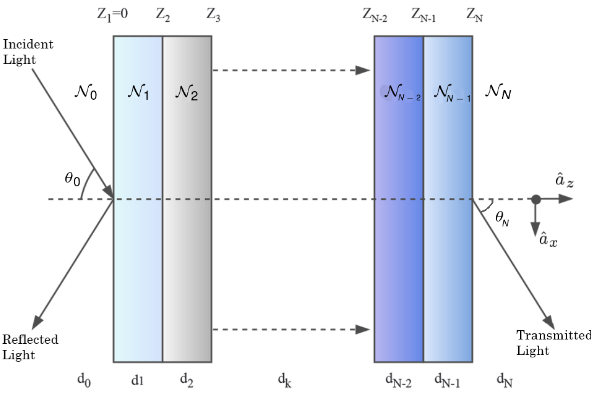

*Source: Adapted from Melo et al. (2019).*

In the figure above, the boundaries of the layers ($Z_k$) delimit the interfaces (with thickness and refractive index given by $d_k$ and $N_k$, respectively) of the multi-layer structure. All layers are uniform, isotropic, and non-magnetic. The first layer ($k = 0$) represents the optical substrate. Along the x-axis, energy is partially transmitted between layers.

The components of the electrical and magnetic fields are related by:

$$
\begin{bmatrix}
U_1 \\ V_1
\end{bmatrix}
= M
\begin{bmatrix}
U_{N-1} \\ V_{N-1}
\end{bmatrix}
\tag{1}
$$

where $U_1, U_{N-1}$ and $V_1, V_{N-1}$ are the tangential components of the electric and magnetic fields, respectively. $M$ (Equation 2) is the complete characteristic system matrix, given by the product of individual interface matrices $M_k$:

$$
M = \prod_{k=1}^{N-1} M_k = \begin{bmatrix}
m_{11} & m_{12} \\ 
m_{21} & m_{22}
\end{bmatrix}
\tag{2}
$$

Each matrix $M_k$ (describing light propagation between layers $k$ and $k+1$) is defined as:

$$
M_k(\lambda) = \begin{bmatrix}
\cos(\beta_k(\lambda)) & j\frac{\sin(\beta_k(\lambda))}{q_k(\lambda)} \\ 
-jq_k(\lambda)\sin(\beta_k(\lambda)) & \cos(\beta_k(\lambda))
\end{bmatrix}
\tag{3}
$$

where:  
- $q_k$ = optical admittance (Equation 4)  
- $\beta_k$ = phase shift (Equation 5)  

$$
q_k(\lambda) = \frac{\sqrt{\mathcal{N}^2_k(\lambda) - \mathcal{N}^2_0(\lambda)\sin^2(\theta_0)}}{\mathcal{N}^2_k(\lambda)}
\tag{4}
$$

$$
\beta_k(\lambda) = \frac{2\pi d_k}{\lambda} \sqrt{\mathcal{N}^2_k(\lambda) - \mathcal{N}^2_0(\lambda)\sin^2(\theta_0)}
\tag{5}
$$

The Fresnel reflective coefficient ($r_p$) and reflectance ($R_p$) for the multi-layer system are:

$$
r_p(\lambda) = \frac{(m_{11} + m_{12}q_N(\lambda))q_0(\lambda) - (m_{21} + m_{22}q_N(\lambda))}{(m_{11} + m_{12}q_N(\lambda))q_0(\lambda) + (m_{21} + m_{22}q_N(\lambda))}
\tag{6}
$$

$$
R_p(\lambda) = |r_p(\lambda)|^2
\tag{7}
$$

*Equations adapted from Shalabney & Abdulhalim (2010).*

## 1.4 Electric Field Calculation
<a id="sec:ElectricalField"></a>

Abdulhalim [1] and others [2] proposed a method to calculate the electric field distribution $|E_x|^2$  along thin film layers and analyte. Using the reference system from **Figure**, the procedure starts with the overall characteristic matrix. The relationship between fields at boundaries is:

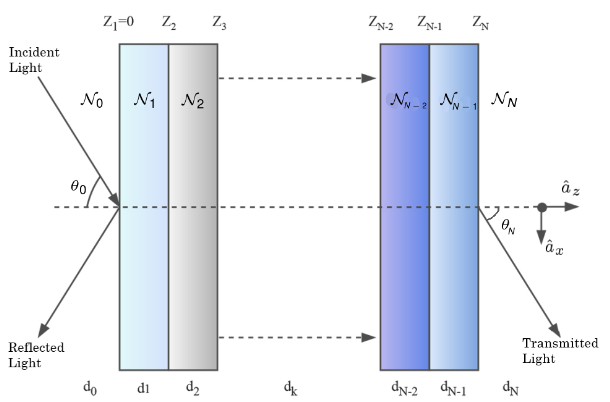

$$
\begin{bmatrix}
H_{y1}^0 \\
-E_{x1}^0
\end{bmatrix}
= M
\begin{bmatrix}
H_{y\mathcal{N}}^0 \\
-E_{x\mathcal{N}}^0
\end{bmatrix}
\tag{1}
$$
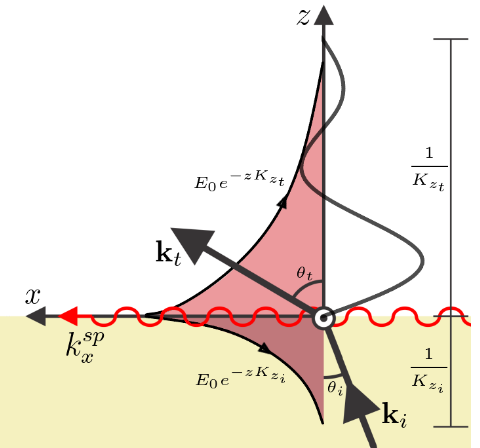

where:
- $M$ = characteristic matrix from Equation X 
- $H_y$, $E_x$ = magnetic/electric field components

The amplitude reflection coefficient $r_p$ is defined as:

$$
r_p = \frac{H_y^{\text{ref}}}{H_y^{\text{inc}}} = \frac{(m_{11} + m_{12}q_N)q_0 - (m_{21} + m_{22}q_N)}{(m_{11} + m_{12}q_N)q_0 + (m_{21} + m_{22}q_N)}
\tag{2}
$$

Field intensity in the first layer (\( $z_1 \leq z \leq z_2$ \)) is given by:

$$
\begin{bmatrix}
H_y^1(z) \\
E_x^1(z)
\end{bmatrix}
= P_1(z)
\begin{bmatrix}
1 + r_p \\
q_0 (1 - r_p) 
\end{bmatrix}H_y^{\text{inc}}
\tag{3}
$$

with propagation matrix:
$$
P_1(z) = \begin{bmatrix}
\cos(\kappa_1 z) & i \sin(\kappa_1 z)/q_1 \\
i q_1 \sin(\kappa_1 z) & \cos(\kappa_1 z)
\end{bmatrix}
\tag{4}
$$
where \( $\kappa_1 = k_0 \mathcal{N}_1 \cos\theta_1$ \).

For subsequent layers (\( $z_j \leq z \leq z_{j+1}$ \)):
$$
\begin{bmatrix}
H_y^j(z) \\
E_x^j(z)
\end{bmatrix}
= P_j(z)
\left(\prod_{l=j-1}^1 P_l(z_l + d_l)\right)
\begin{bmatrix}
1 + r_p \\
q_1 (1 - r_p)
\end{bmatrix}H_y^{\text{inc}}
\tag{5}
$$

with layer propagation matrix:
$$
P_j(z) = \begin{bmatrix}
\cos(\kappa_j \Delta z) & i \sin(\kappa_j \Delta z)/q_j \\
i q_j \sin(\kappa_j \Delta z) & \cos(\kappa_j \Delta z)
\end{bmatrix}
\tag{6}
$$

where:
- \( $\Delta z = z - z_j$\)
- \( $\kappa_j = k_0 \mathcal{N}_j \cos\theta_j $\)
- \( $k_0 = 2\pi/\lambda $\) (free space wave number)
- \( $d_j$ \) = layer thickness

*Adapted from Shalabney & Abdulhalim [1] and Tabassum et al. [2].*

## 1.5 Exemplo considerando os dados da tese de doutorado de Cleumar

### 1.5.1 Gaussian Beam part: angle and intensity distributions

0.009632973045351325


(-0.028797305060686746, 0.028797305060686746)

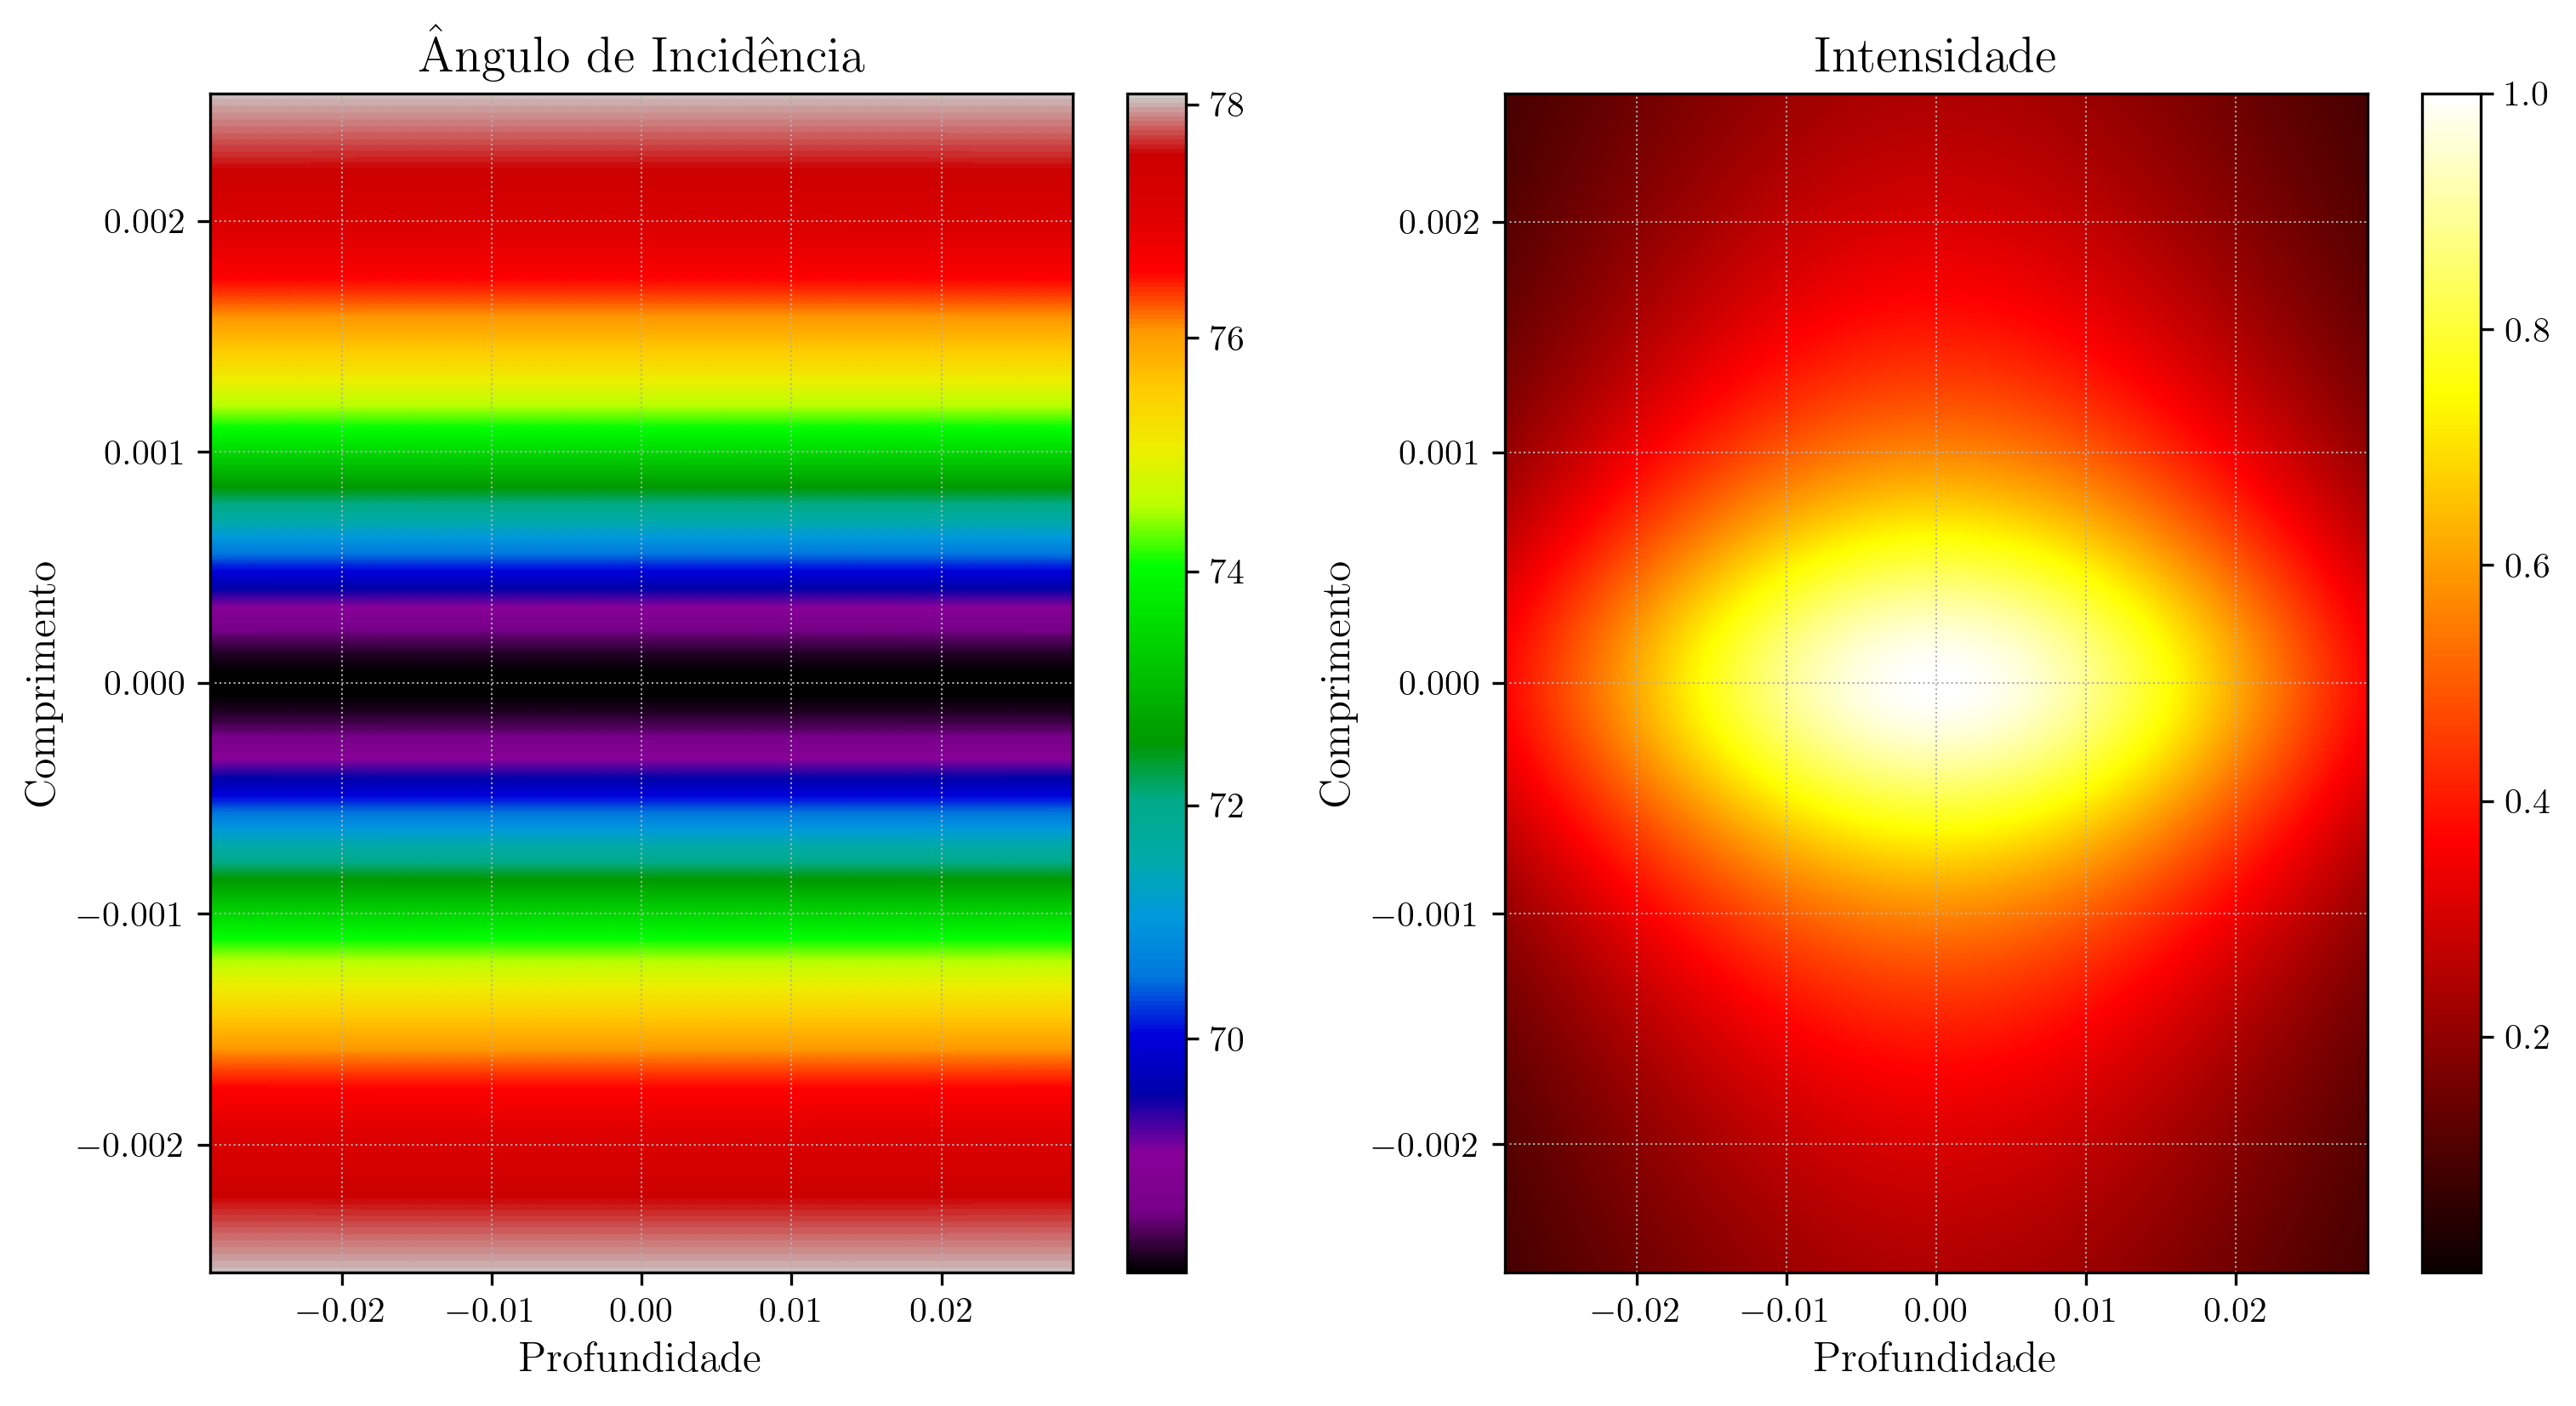

In [65]:
λ    = 670e-9
n_p   = 1.5139 
θ    = 68*π/180
k    = 2*π*n_p/λ
θ_0x = 5/2*π/180
θ_0y = 30/2*π/180

W_0x = np.sqrt(λ/(π*θ_0x))
W_0y = np.sqrt(λ/(π*θ_0y))

z_0x = np.sqrt(λ/(π*θ_0x**2))
z_0y = np.sqrt(λ/(π*θ_0y**2))

# Calculo da distância focal da lente colimadora
D = 10e-3 # Diâmetro do feixe colimado na direção de maior divergência (y)
fc = (D/2)/np.tan(θ_0x)
ff = 20e-3 # distância focal da lente cilíndrica

# Direção paralela a polarização
W_0xc = (1/np.sqrt(2))*(fc/z_0x)*W_0x
z_xc  = ((fc**2)/(2*(z_0x**2)))*z_0x + fc
z_0xc = ((fc**2)/(2*(z_0x**2)))*z_0x

W_0xf = W_0xc/np.sqrt(1 + ((z_0xc/ff)**2))
z_xf  = ff/(1 + ((ff/z_0xc)**2))
z_0xf = z_0xc/(1 + ((z_0xc/ff)**2))

W_0xr = W_0xf
z_0xr = n_p*z_0xf

# Direção perpendicular a polarização
W_0yc = ((fc/z_0x)/np.sqrt(1 + ((z_0y/z_0x)**2)))*W_0y
z_yc  = (((fc/z_0x)**2)/(1 + ((z_0y/z_0x)**2)))*z_0x + fc
z_0yc = (((fc/z_0x)**2)/(1 + ((z_0y/z_0x)**2)))*z_0y

W_0yr = W_0yc
z_0yr = n_p*z_0yc

print(W_0yr)

def W(W0, z0, z):
    return W0*np.sqrt(1 + ((z/z0)**2))

def R(z0, z):
    return z*(1 + ((z0/z)**2))

def ζ(z0, z):
    return np.arctan(z/z0)

# Corrected phase function with tilt
def φ(k, z0, ρ, z, theta=θ):
    phase_tilt = k * ρ * np.sin(theta)  # Linear phase for tilt
    phase = k*z - ζ(z0, z) + (k*(ρ**2))/(2*R(z0, z)) + phase_tilt
    return phase

def grad_φ(k, W0, z0, ρ, z):
    return np.vstack([el.flatten() for el in [
        (k*ρ)/R(z0, z),
        k - ((k*(ρ**2))/(2*(R(z0, z)**2)))*(1 - ((z0/z)**2)) - ((W0/W(W0, z0, z))**2)
    ]])

def U(k, A0, W0, z0, ρ, z):
    return A0*(W0/W(W0, z0, z))*np.exp(-((ρ**2)/(W(W0, z0, z)**2)))*np.exp(-1j*φ(k, z0, ρ, z))


l_x = (2*W_0xr*z_0xr)/np.sqrt((z_0xr**2) - ((W_0xr*np.sin(θ))**2))
l_y = 2*W_0yc*np.sqrt(1 + (((-z_yc + z_xc + z_xf)/(z_0yc))**2))

s = 2*np.linspace(-l_x, l_x, 1024)
y = 2*np.linspace(-l_y, l_y, 1280)

[Y, S] = np.meshgrid(y, s)

X = S*np.cos(θ)

Zx = -S*np.sin(θ)
Zy = -S*np.sin(θ) + n_p*(-z_yc + z_xc + z_xf)


grad_φx_2d = grad_φ(k, W_0xr, z_0xr, X, Zx)
grad_φx = np.vstack([grad_φx_2d[0,:], np.zeros((1, grad_φx_2d.shape[1])), grad_φx_2d[1,:]])

grad_φy_2d = grad_φ(k, W_0yr, z_0yr, Y, Zy)
grad_φy = np.vstack([np.zeros((1, grad_φy_2d.shape[1])), grad_φy_2d[0,:], grad_φy_2d[1,:]])

grad_total = grad_φx + grad_φy

k_vec = (grad_total/np.linalg.norm(grad_total, axis=0))
n = np.array([[np.sin(θ), 0, np.cos(θ)]]).T

incidence_angle = (np.arccos(n.T @ k_vec)*180/π).reshape(*S.shape)

Wx = W(W_0xr, z_0xr, Zx)
Wy = W(W_0yr, z_0yr, Zy)

intensity = (1/(π*Wx*Wy))*np.exp(-(((X/Wx)**2) + ((Y/Wy)**2)))
intensity = intensity / np.max(intensity)  # Normalizando corretamente

mask = intensity >= 0  

incidence_angle_m = np.where(mask, incidence_angle, np.nan)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6), dpi = 300)

cax1 = ax1.pcolormesh(Y, S, incidence_angle_m, cmap='nipy_spectral', shading='gouraud', )
plt.colorbar(cax1)
ax1.set_title('Ângulo de Incidência')
ax1.set_xlabel('Profundidade')
ax1.set_ylabel('Comprimento')
ax1.set_xlim([min(y)/4,max(y)/4])

cax1 = ax2.pcolormesh(Y, S, intensity, cmap='hot', shading='auto', label = 'Angle')
plt.colorbar(cax1)
cax1.set_label('Angle')
ax2.set_title('Intensidade')
ax2.set_xlabel('Profundidade')
ax2.set_ylabel('Comprimento')
ax2.set_xlim([min(y)/4,max(y)/4])

In [66]:
# Create grid
y = np.linspace(-2*W_0yr, 2*W_0yr, 1280)
s = np.linspace(-2*W_0xr, 2*W_0xr, 1024)
Y, S = np.meshgrid(y, s)

# Calculate field components (astigmatic beam)
E_x = U(k, 1, W_0xr, z_0xr, S, Zx)  # x-component
E_y = U(k, 1, W_0yr, z_0yr, Y, Zy)  # y-component
E_field = E_x * E_y  # Total field (separable)

# 2D FFT
E_fft = np.fft.fftshift(np.fft.fft2(E_field))

# Frequency axes
Δy = y[1] - y[0]
Δs = s[1] - s[0]
fy = np.fft.fftshift(np.fft.fftfreq(len(y), Δy)) * λ  # Spatial freq → directional cosines
fs = np.fft.fftshift(np.fft.fftfreq(len(s), Δs)) * λ

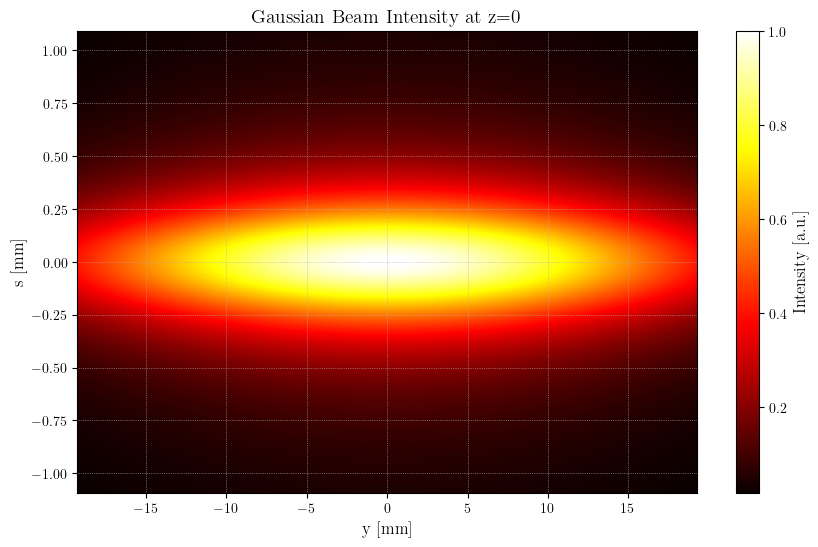

In [67]:
plt.figure(figsize=(10, 6))
plt.pcolormesh(Y*1e3, S*1e3, np.abs(E_field)**2/np.max(np.abs(E_field)**2), cmap='hot', shading='auto')
plt.title('Gaussian Beam Intensity at z=0')
plt.xlabel('y [mm]')
plt.ylabel('s [mm]')
plt.colorbar(label='Intensity [a.u.]')
plt.show()

In [68]:
intensity = np.abs(E_field)**2/np.max(np.abs(E_field)**2)

### 1.5.2 Multi-layer reflectance calculations

In [69]:
def compute_rp(th, n0, n1, n2, n3, d1, d2, wavelength):
    # Compute q values for each layer
    q0 = jnp.sqrt(n0**2 - (n0 * jnp.sin(th))**2) / n0**2
    q1 = jnp.sqrt(n1**2 - (n0 * jnp.sin(th))**2) / n1**2
    q2 = jnp.sqrt(n2**2 - (n0 * jnp.sin(th))**2) / n2**2
    q3 = jnp.sqrt(n3**2 - (n0 * jnp.sin(th))**2) / n3**2

    # Compute beta values for layers 1 and 2
    beta1 = 2 * jnp.pi * d1 * jnp.sqrt(n1**2 - (n0 * jnp.sin(th))**2) / wavelength
    beta2 = 2 * jnp.pi * d2 * jnp.sqrt(n2**2 - (n0 * jnp.sin(th))**2) / wavelength

    # Layer matrices M1 and M2
    M1 = jnp.array([
        [jnp.cos(beta1), -1j * jnp.sin(beta1) / q1],
        [-1j * q1 * jnp.sin(beta1), jnp.cos(beta1)]
    ])
    M2 = jnp.array([
        [jnp.cos(beta2), -1j * jnp.sin(beta2) / q2],
        [-1j * q2 * jnp.sin(beta2), jnp.cos(beta2)]
    ])

    # Overall matrix product
    M = jnp.matmul(M1, M2)

    # Reflection coefficient for p-polarized light
    numerator = (M[0, 0] + M[0, 1] * q3) * q0 - (M[1, 0] + M[1, 1] * q3)
    denominator = (M[0, 0] + M[0, 1] * q3) * q0 + (M[1, 0] + M[1, 1] * q3)
    rp = numerator / denominator

    return jnp.abs(rp)**2

def fresnel_4_optimized(n0, n1, n2, n3, d1, d2, wavelength, ang):
    ang_rad = jnp.deg2rad(ang)
    # Vectorize compute_rp over angles using vmap
    batched_compute_rp = jax.vmap(compute_rp, in_axes=(0, None, None, None, None, None, None, None))
    RP = batched_compute_rp(ang_rad, n0, n1, n2, n3, d1, d2, wavelength)
    angres = ang[jnp.argmin(RP)]
    return RP, angres

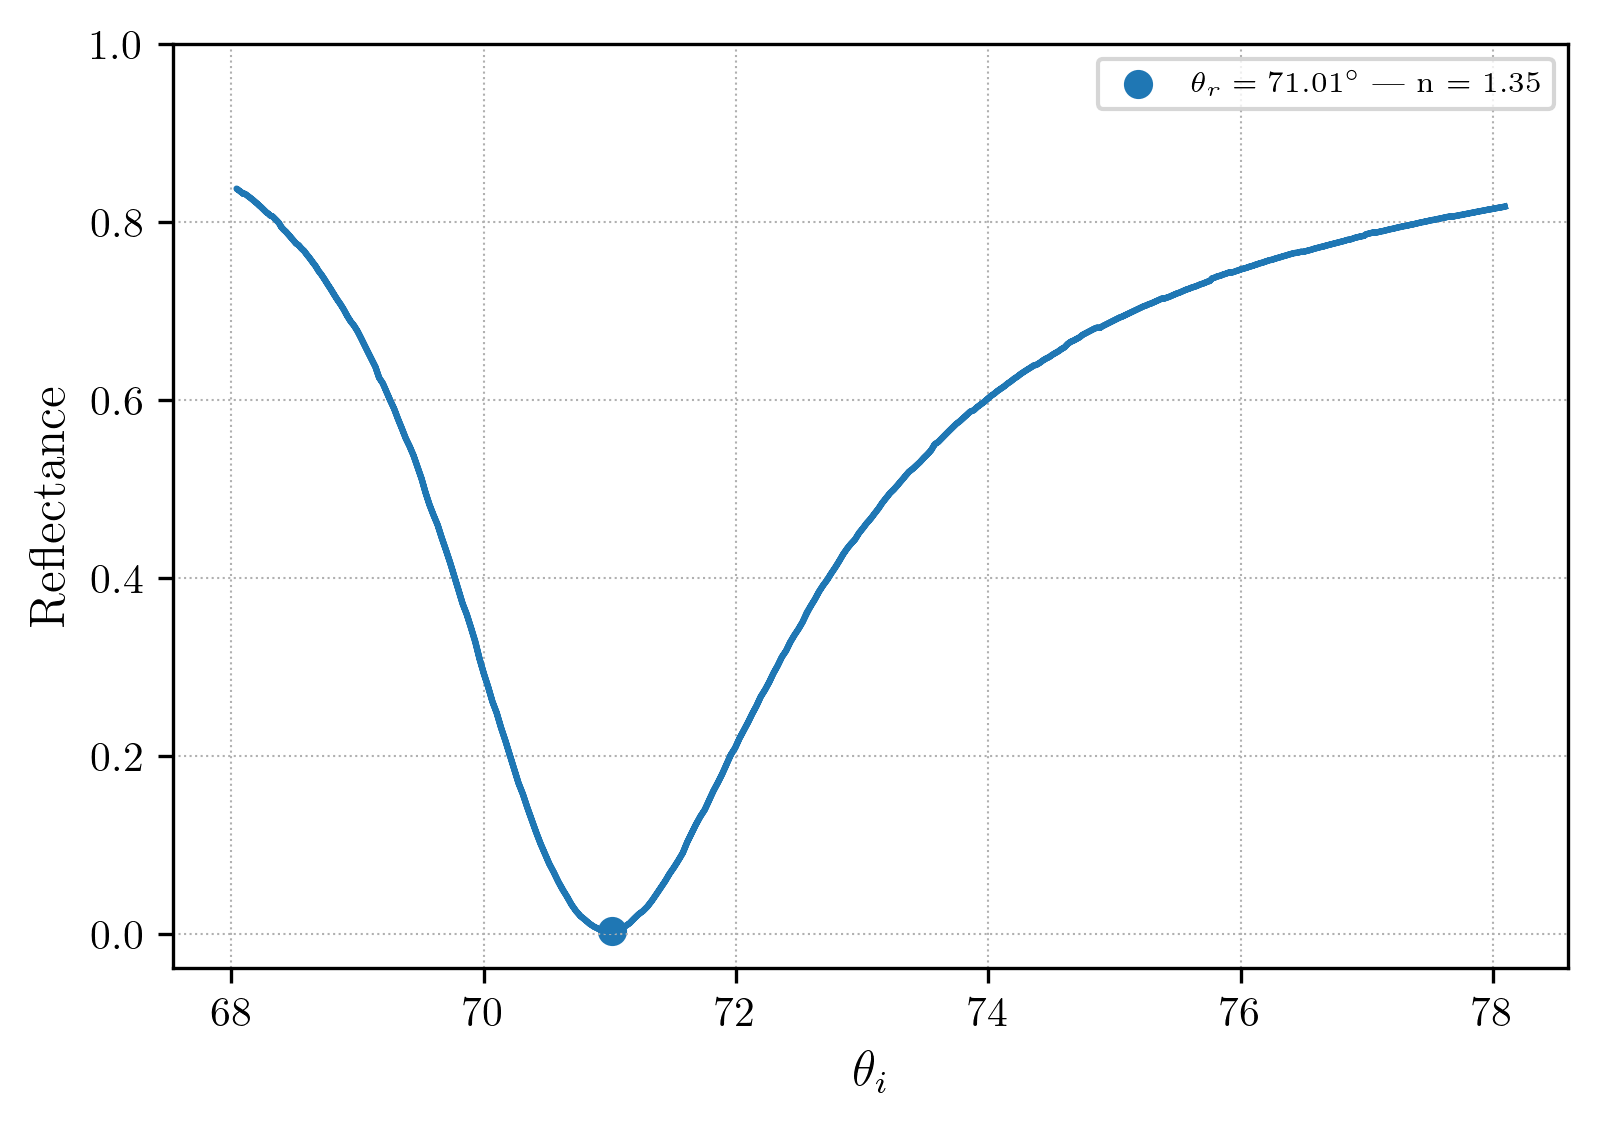

In [70]:
n3 = 1.3310 + 2.1120e-8j  # WATER
#RIndexes = [n3, n3 + 5e-3, n3 + 2 * 5e-3, n3 + 3 * 5e-3, n3 + 4 * 5e-3]
RIndexes = [n3 + 3 * 5e-3]
n1 = 0.13767 + 3.7917j  # Gold
n0 = 1.5139  # BK7
d1 = 50e-9  # GOLD
d2 = 100e-9  # substance
la = 670e-9  # SOURCE
RP_indexes = []
angres_indexes = []
ang = incidence_angle_m[:,0]

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
for n in RIndexes:
    RP, angres = fresnel_4_optimized(n0, n1, n, n3, d1, d2, la, ang)
    RP_indexes.append(RP)
    angres_indexes.append(angres)
    ax.plot(ang, RP)
    ax.scatter(
        angres,
        np.min(RP),
        label=r"$\theta_r =" + f"{angres:.2f}^\circ$ | n = {np.real(n):.2f}",
    )
    ax.set_xlabel(r"$\theta_i$")
    ax.set_ylabel(r"Reflectance")
    # setting the y-axis ticks
    ax.yaxis.set_ticks(np.arange(0, 1.1, 0.2))
    ax.legend(fontsize=7)

Cada coluna de profundidade (que gera um perfil de intensidade e a mesma distribuição de ângulo) é uma curva SPR. Neste primeiro momento, foi considerado que a reflectância para cada ângulo é ponderada pela intensidade do feixe gaussiano, resultando em:

$$R_{\text{feixe}}(\theta_i,\text{profundidade}) = R_{\text{fresnel}}(\theta_i)I(\theta_i,\text{profundidade})$$

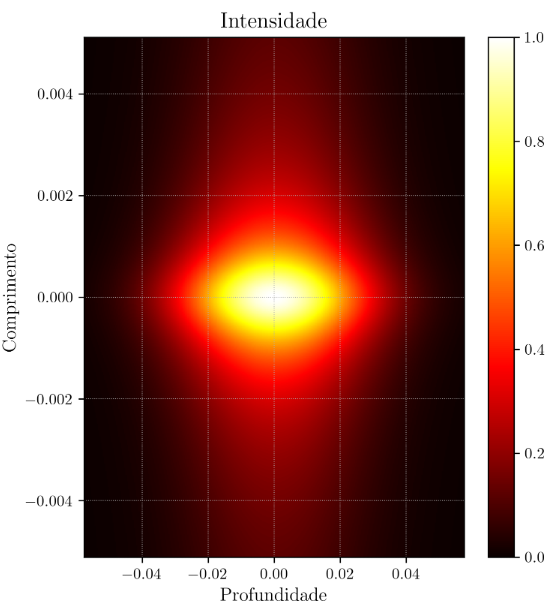

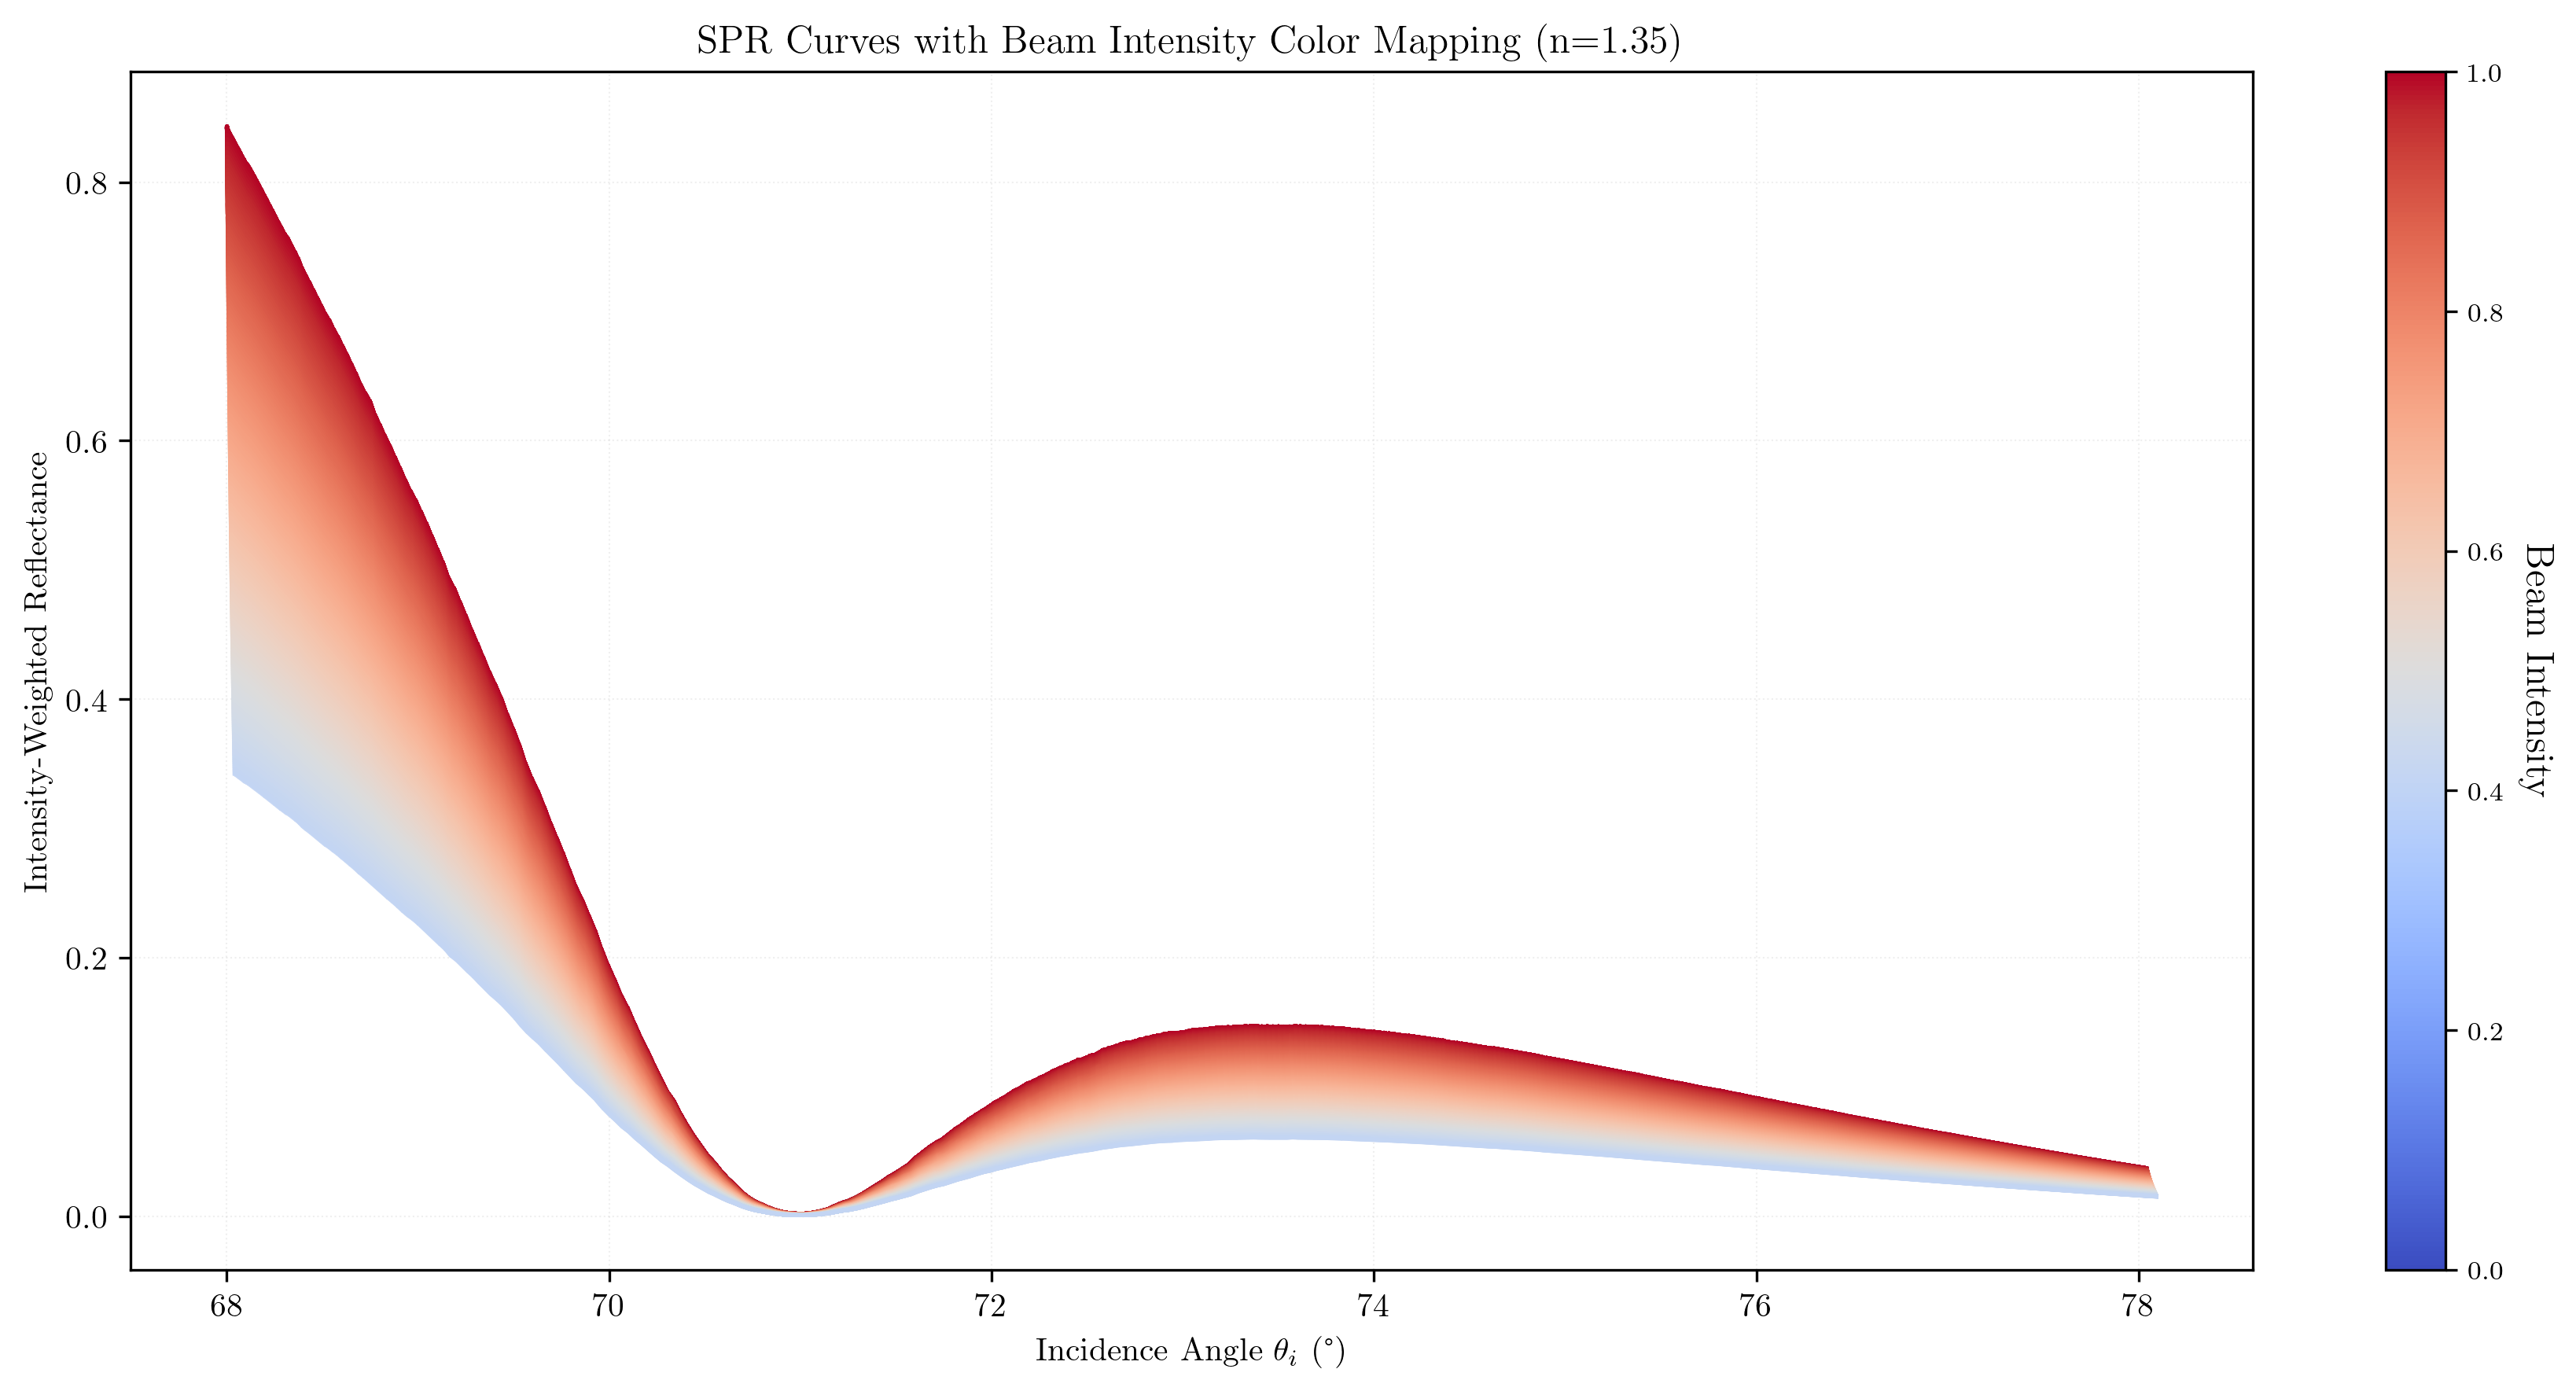

In [71]:
# After generating incidence_angle_m and intensity from Gaussian beam code
n = RIndexes[0]  # Example for specific refractive index

fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

# Create batched reflectance computation function
batched_compute_rp = jax.vmap(compute_rp, in_axes=(0, None, None, None, None, None, None, None))

# Set up colormap and normalization
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(vmin=0, vmax=np.max(intensity))

# Create scalar mappable for colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

for col_idx in range(incidence_angle_m.shape[1]):
    # Extract column data with valid entries
    col_mask = ~np.isnan(incidence_angle_m[:, col_idx])
    valid_angles_deg = incidence_angle_m[:, col_idx][col_mask]
    valid_intensity = intensity[:, col_idx][col_mask]
    
    if len(valid_angles_deg) == 0:
        continue
    
    # Compute reflectance for current column
    valid_angles_rad = jnp.deg2rad(valid_angles_deg)
    RP = np.array(batched_compute_rp(valid_angles_rad, n0, n1, n, n3, d1, d2, la))
    
    # Apply intensity weighting
    weighted_RP = RP * valid_intensity
    
    # Sort values by angle for clean plotting
    sort_idx = np.argsort(valid_angles_deg)
    sorted_angles = valid_angles_deg[sort_idx]
    sorted_RP = weighted_RP[sort_idx]
    
    # Get color based on maximum intensity in column
    col_intensity = np.max(valid_intensity)
    line_color = cmap(norm(col_intensity))
    
    ax.plot(sorted_angles, sorted_RP, 
            color=line_color,
            linewidth=1.2,
            alpha=0.7)

# Add colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Beam Intensity', rotation=270, labelpad=15)
cbar.ax.tick_params(labelsize=8)

ax.set_xlabel(r'Incidence Angle $\theta_i$ (°)', fontsize=10)
ax.set_ylabel('Intensity-Weighted Reflectance', fontsize=10)
ax.set_title(f'SPR Curves with Beam Intensity Color Mapping (n={np.real(n):.2f})', fontsize=12)
ax.grid(True, alpha=0.2)
#ax.set_xlim(ang.min(), ang.max())

plt.tight_layout()
plt.show()

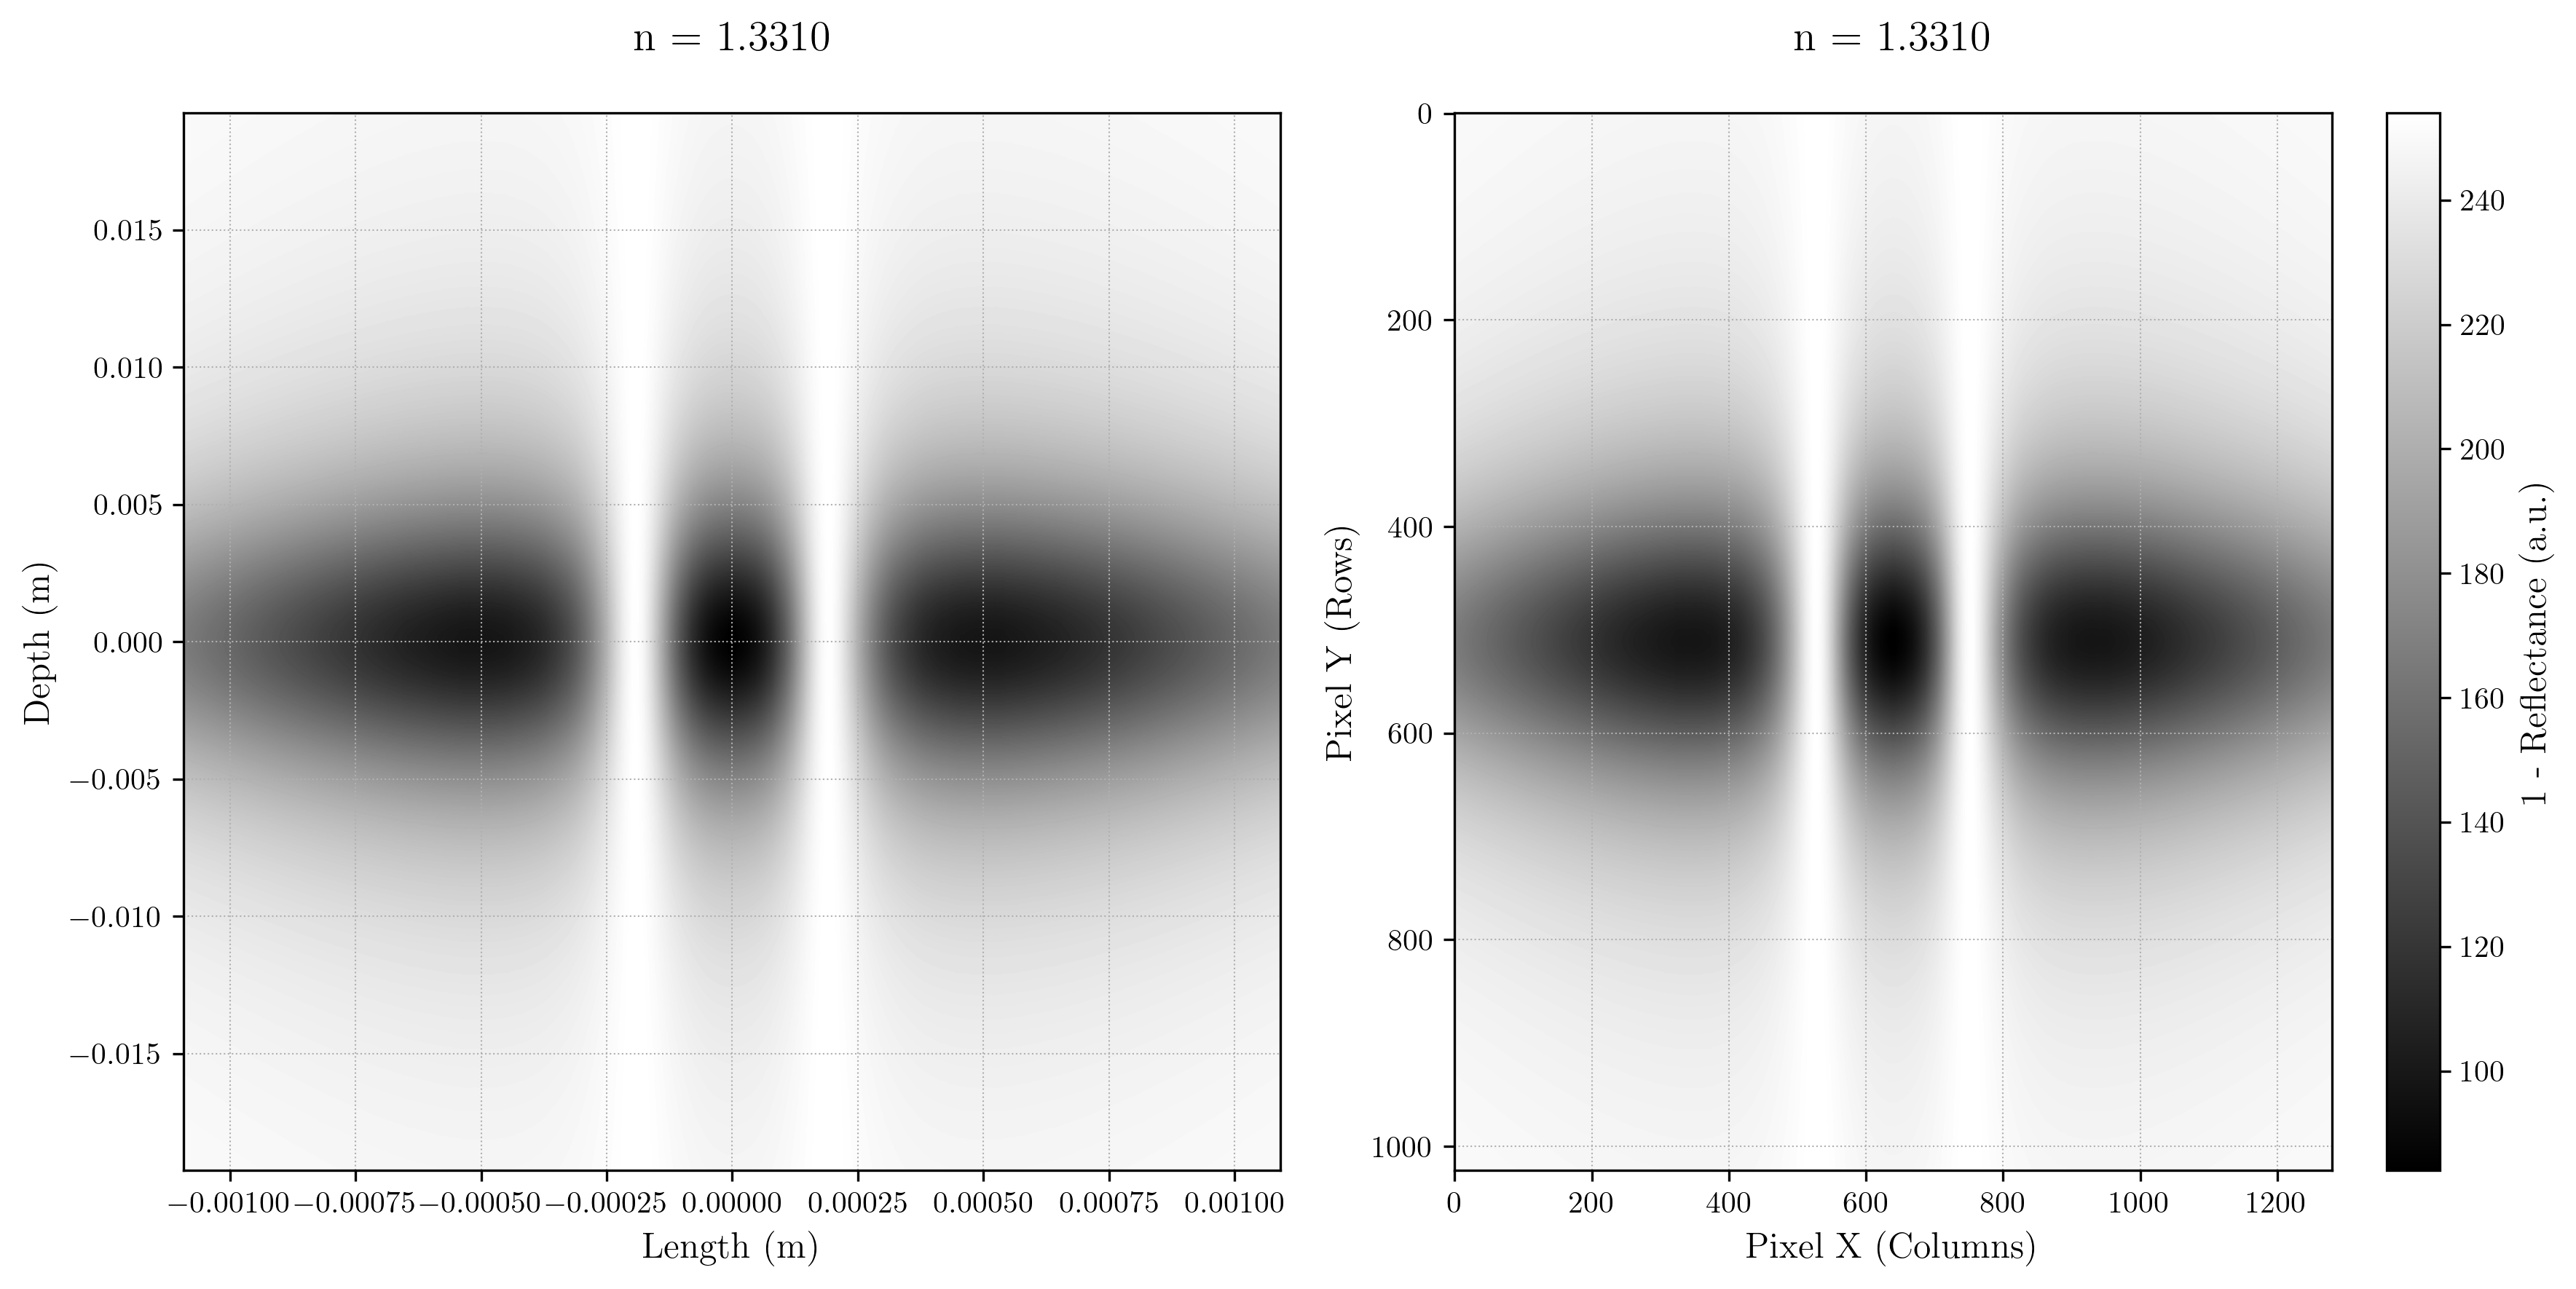

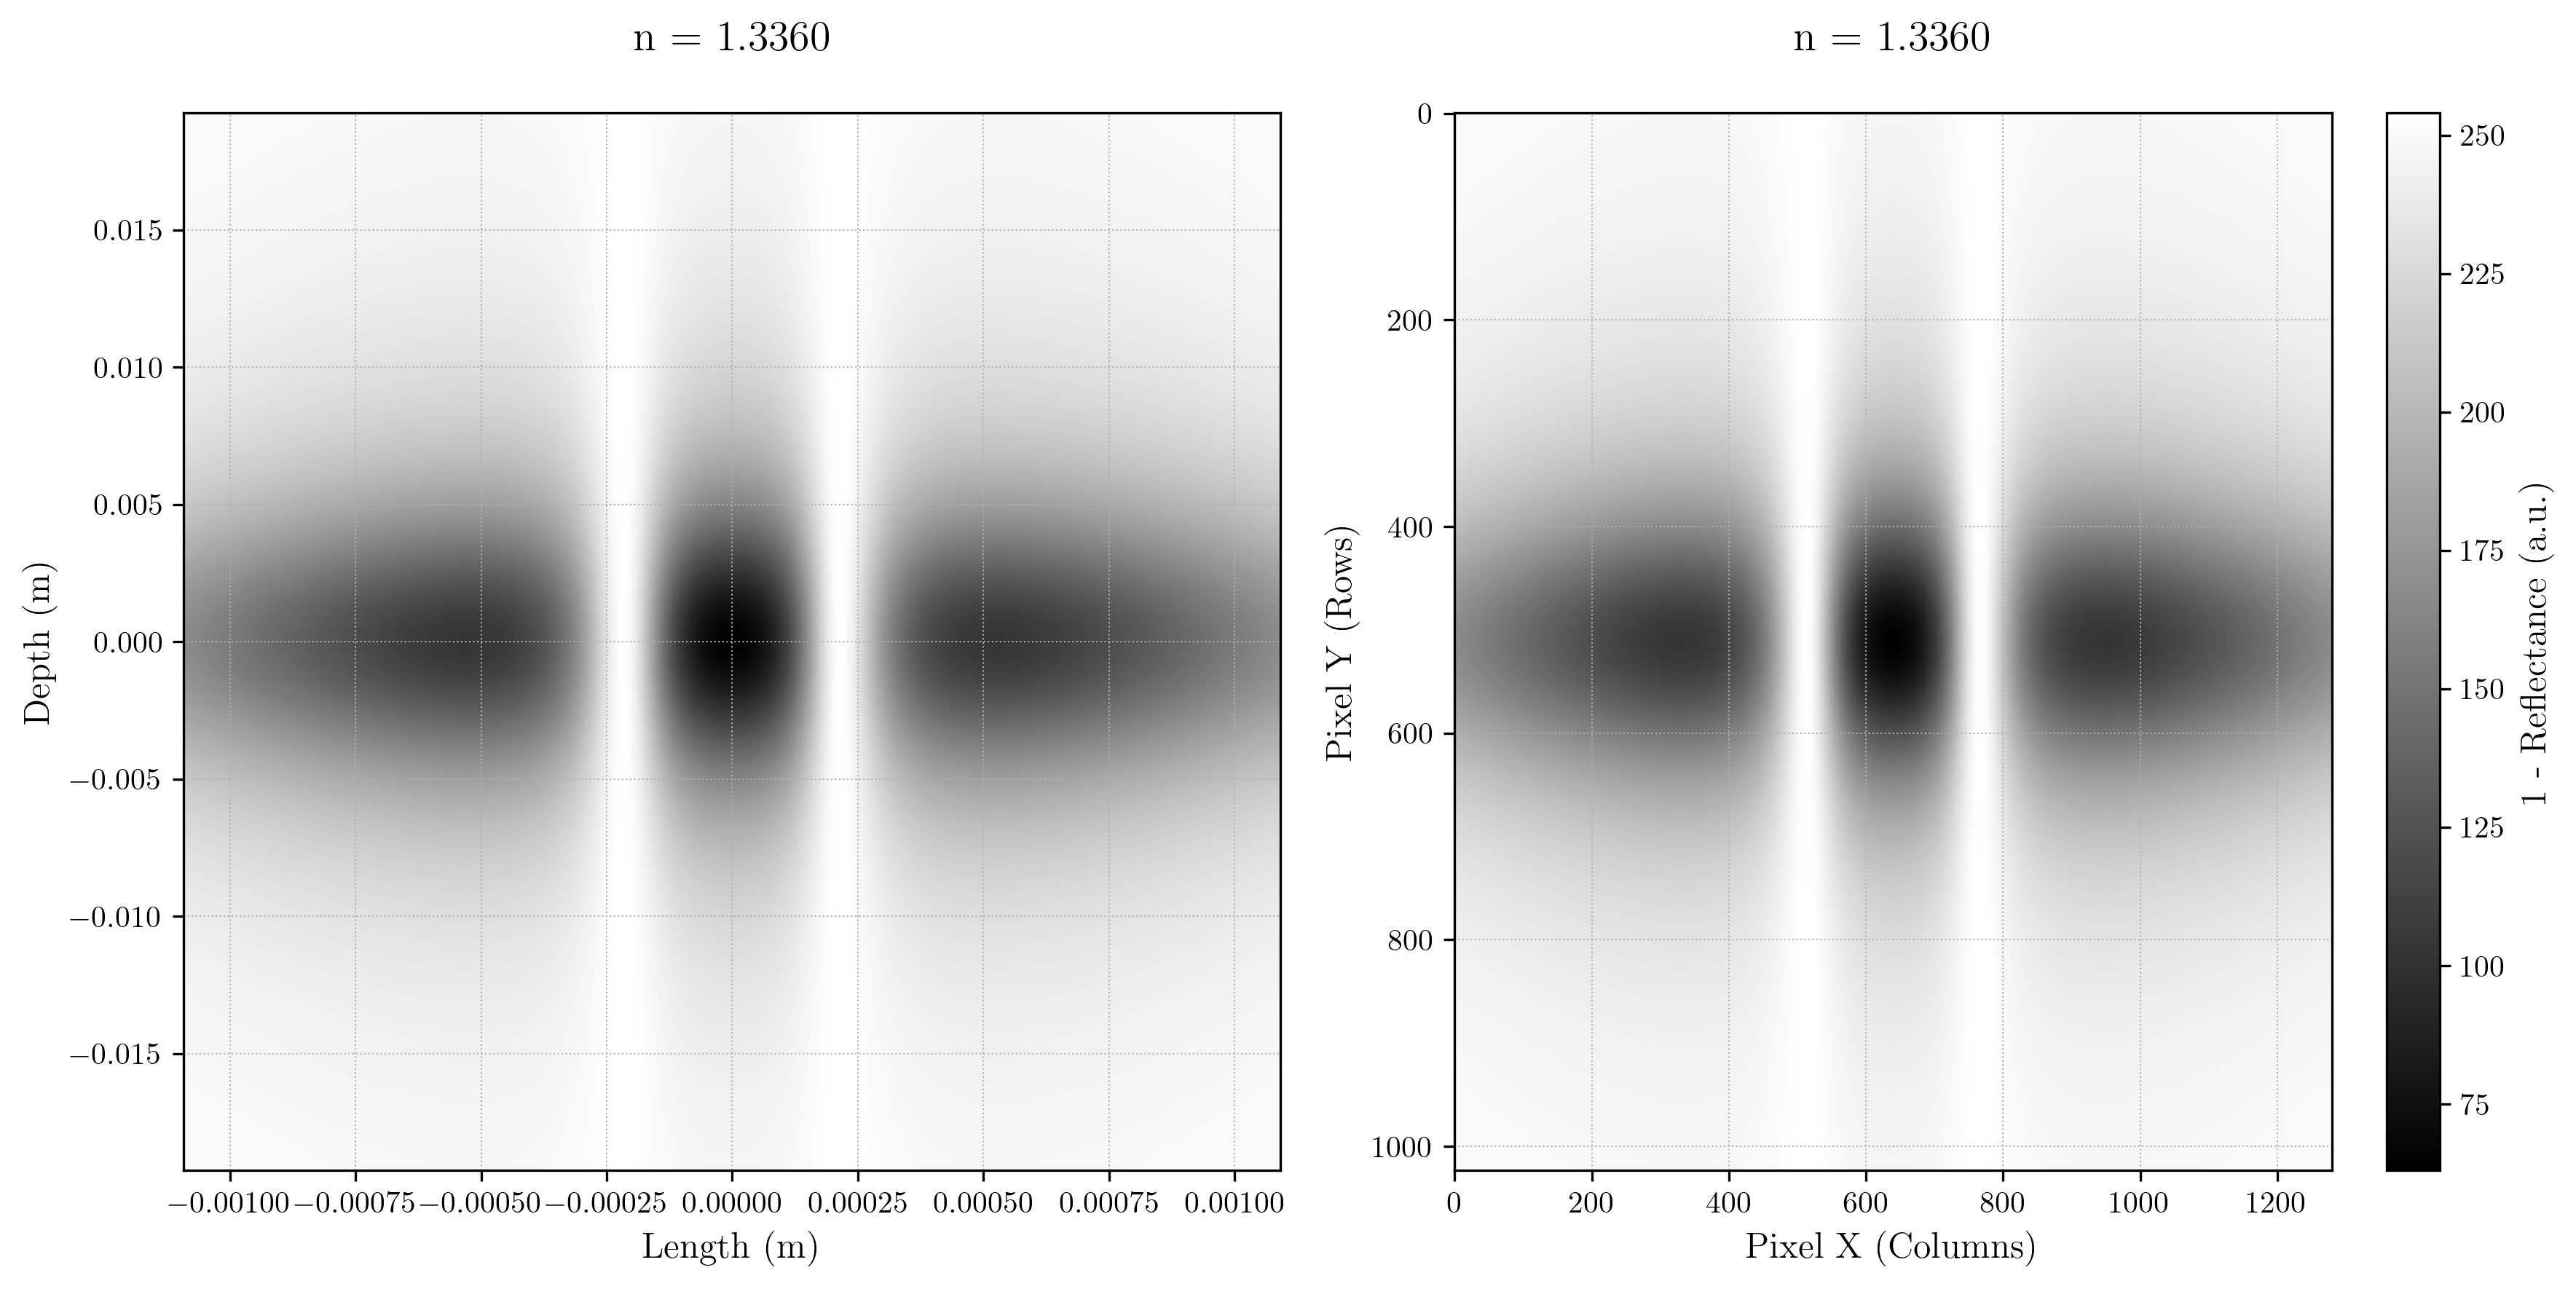

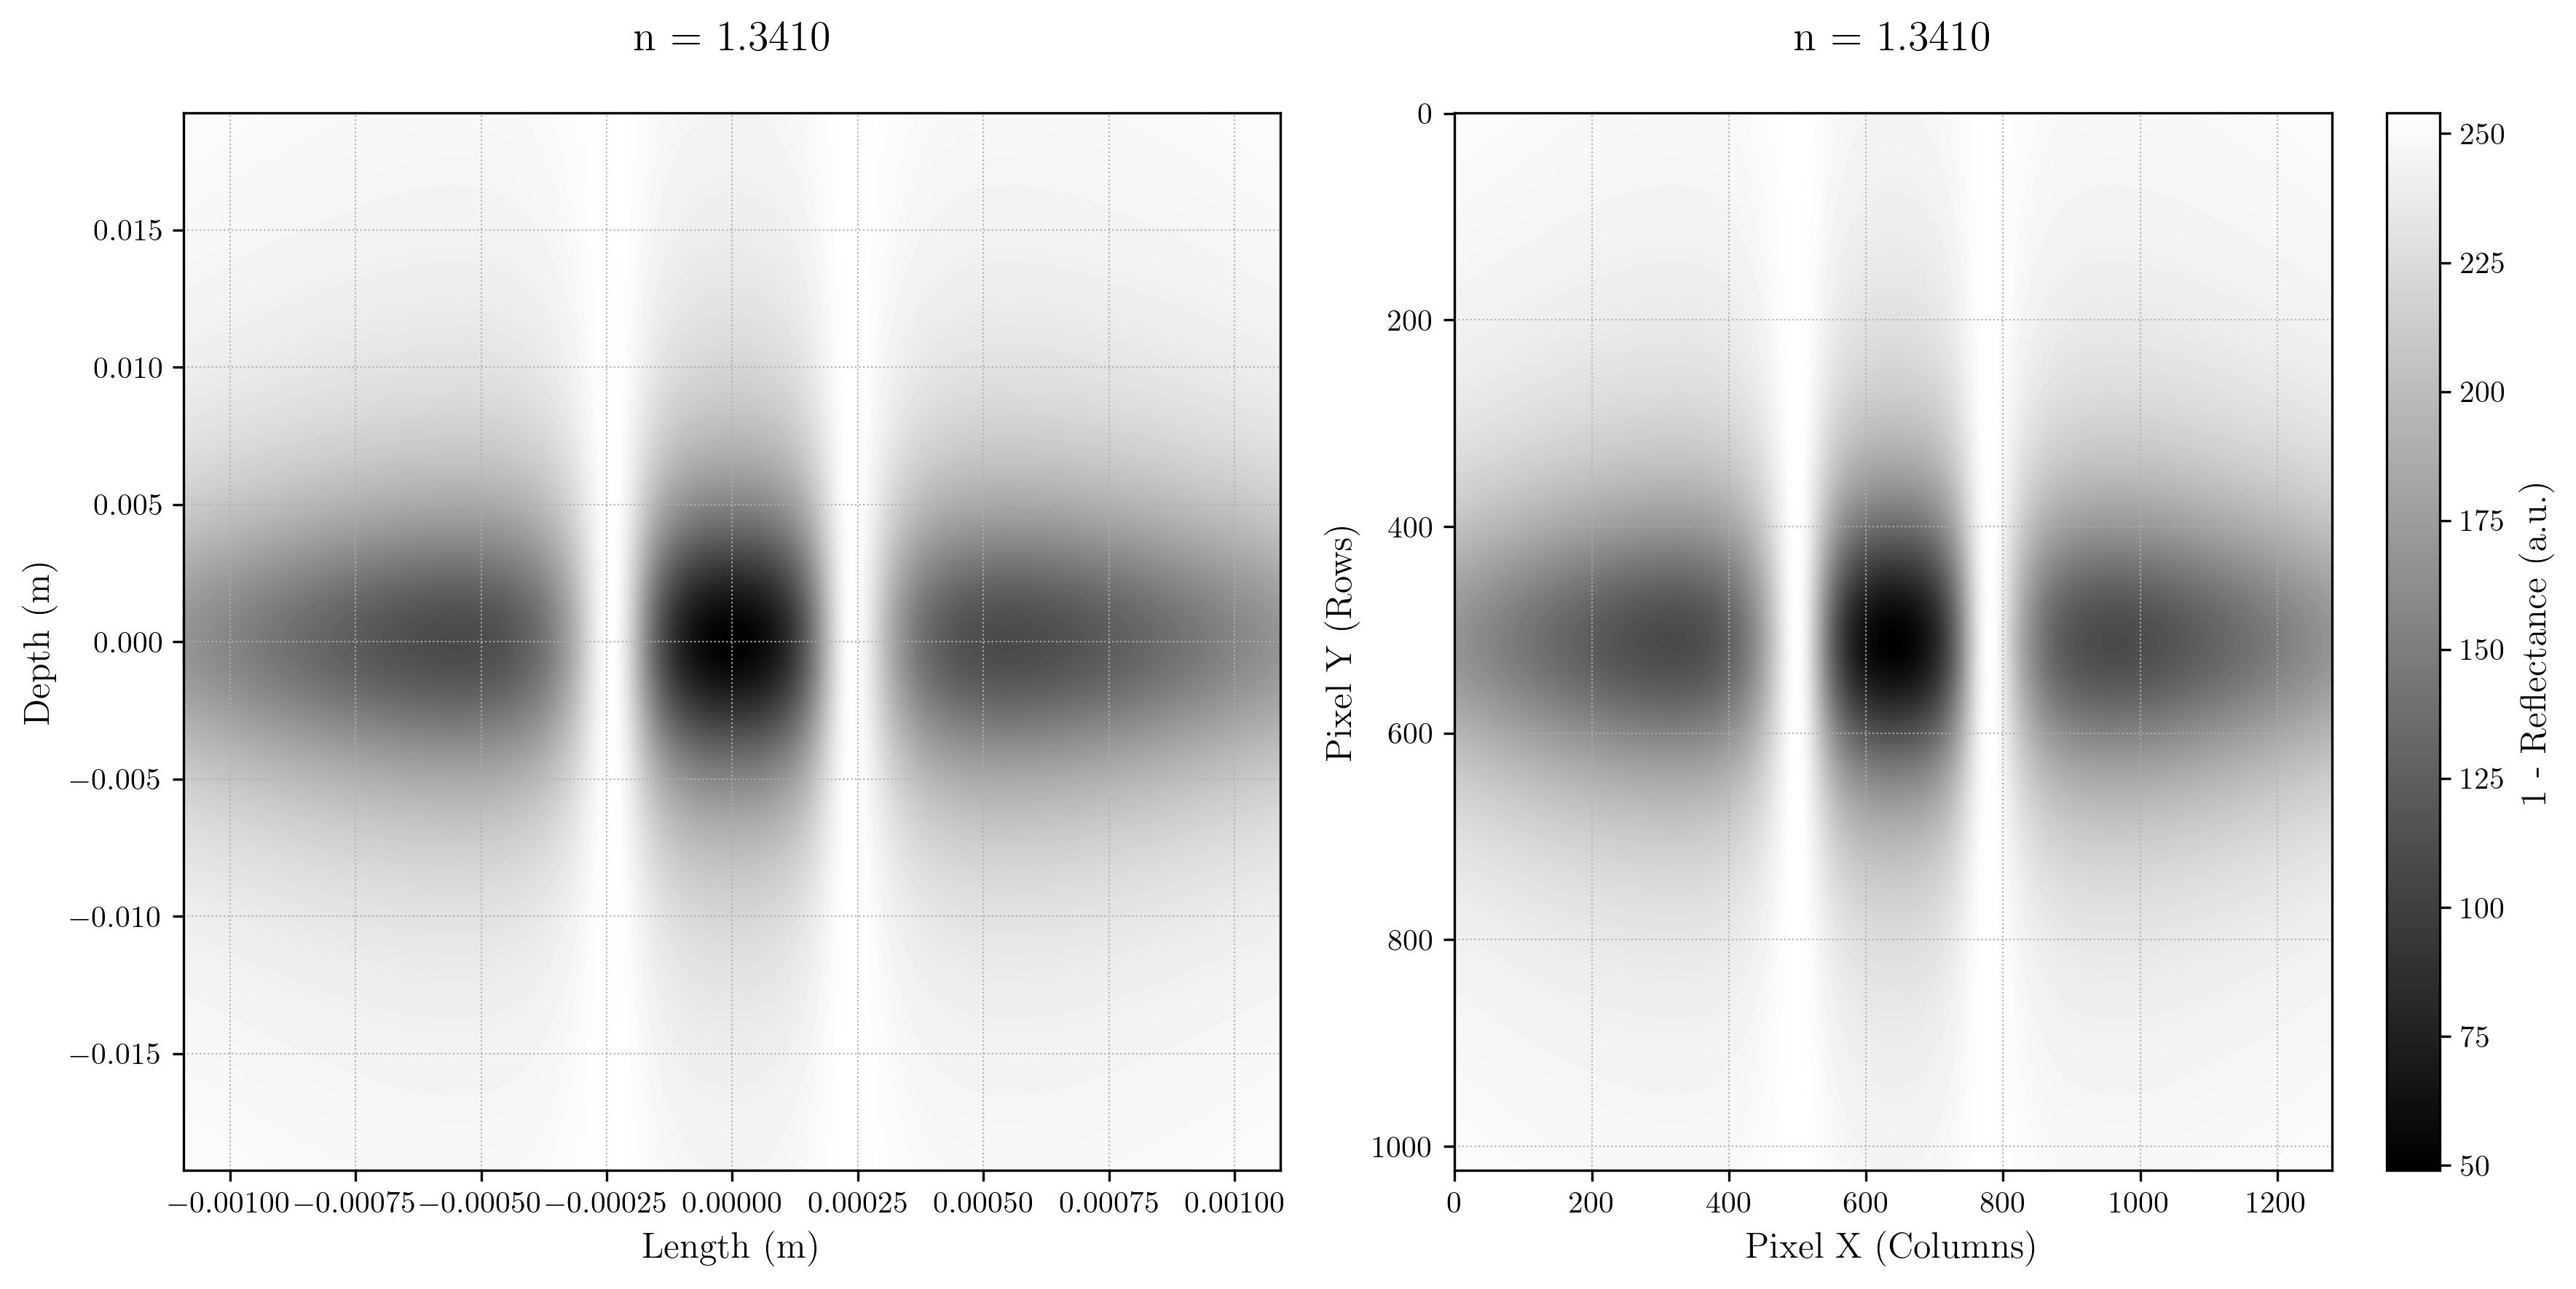

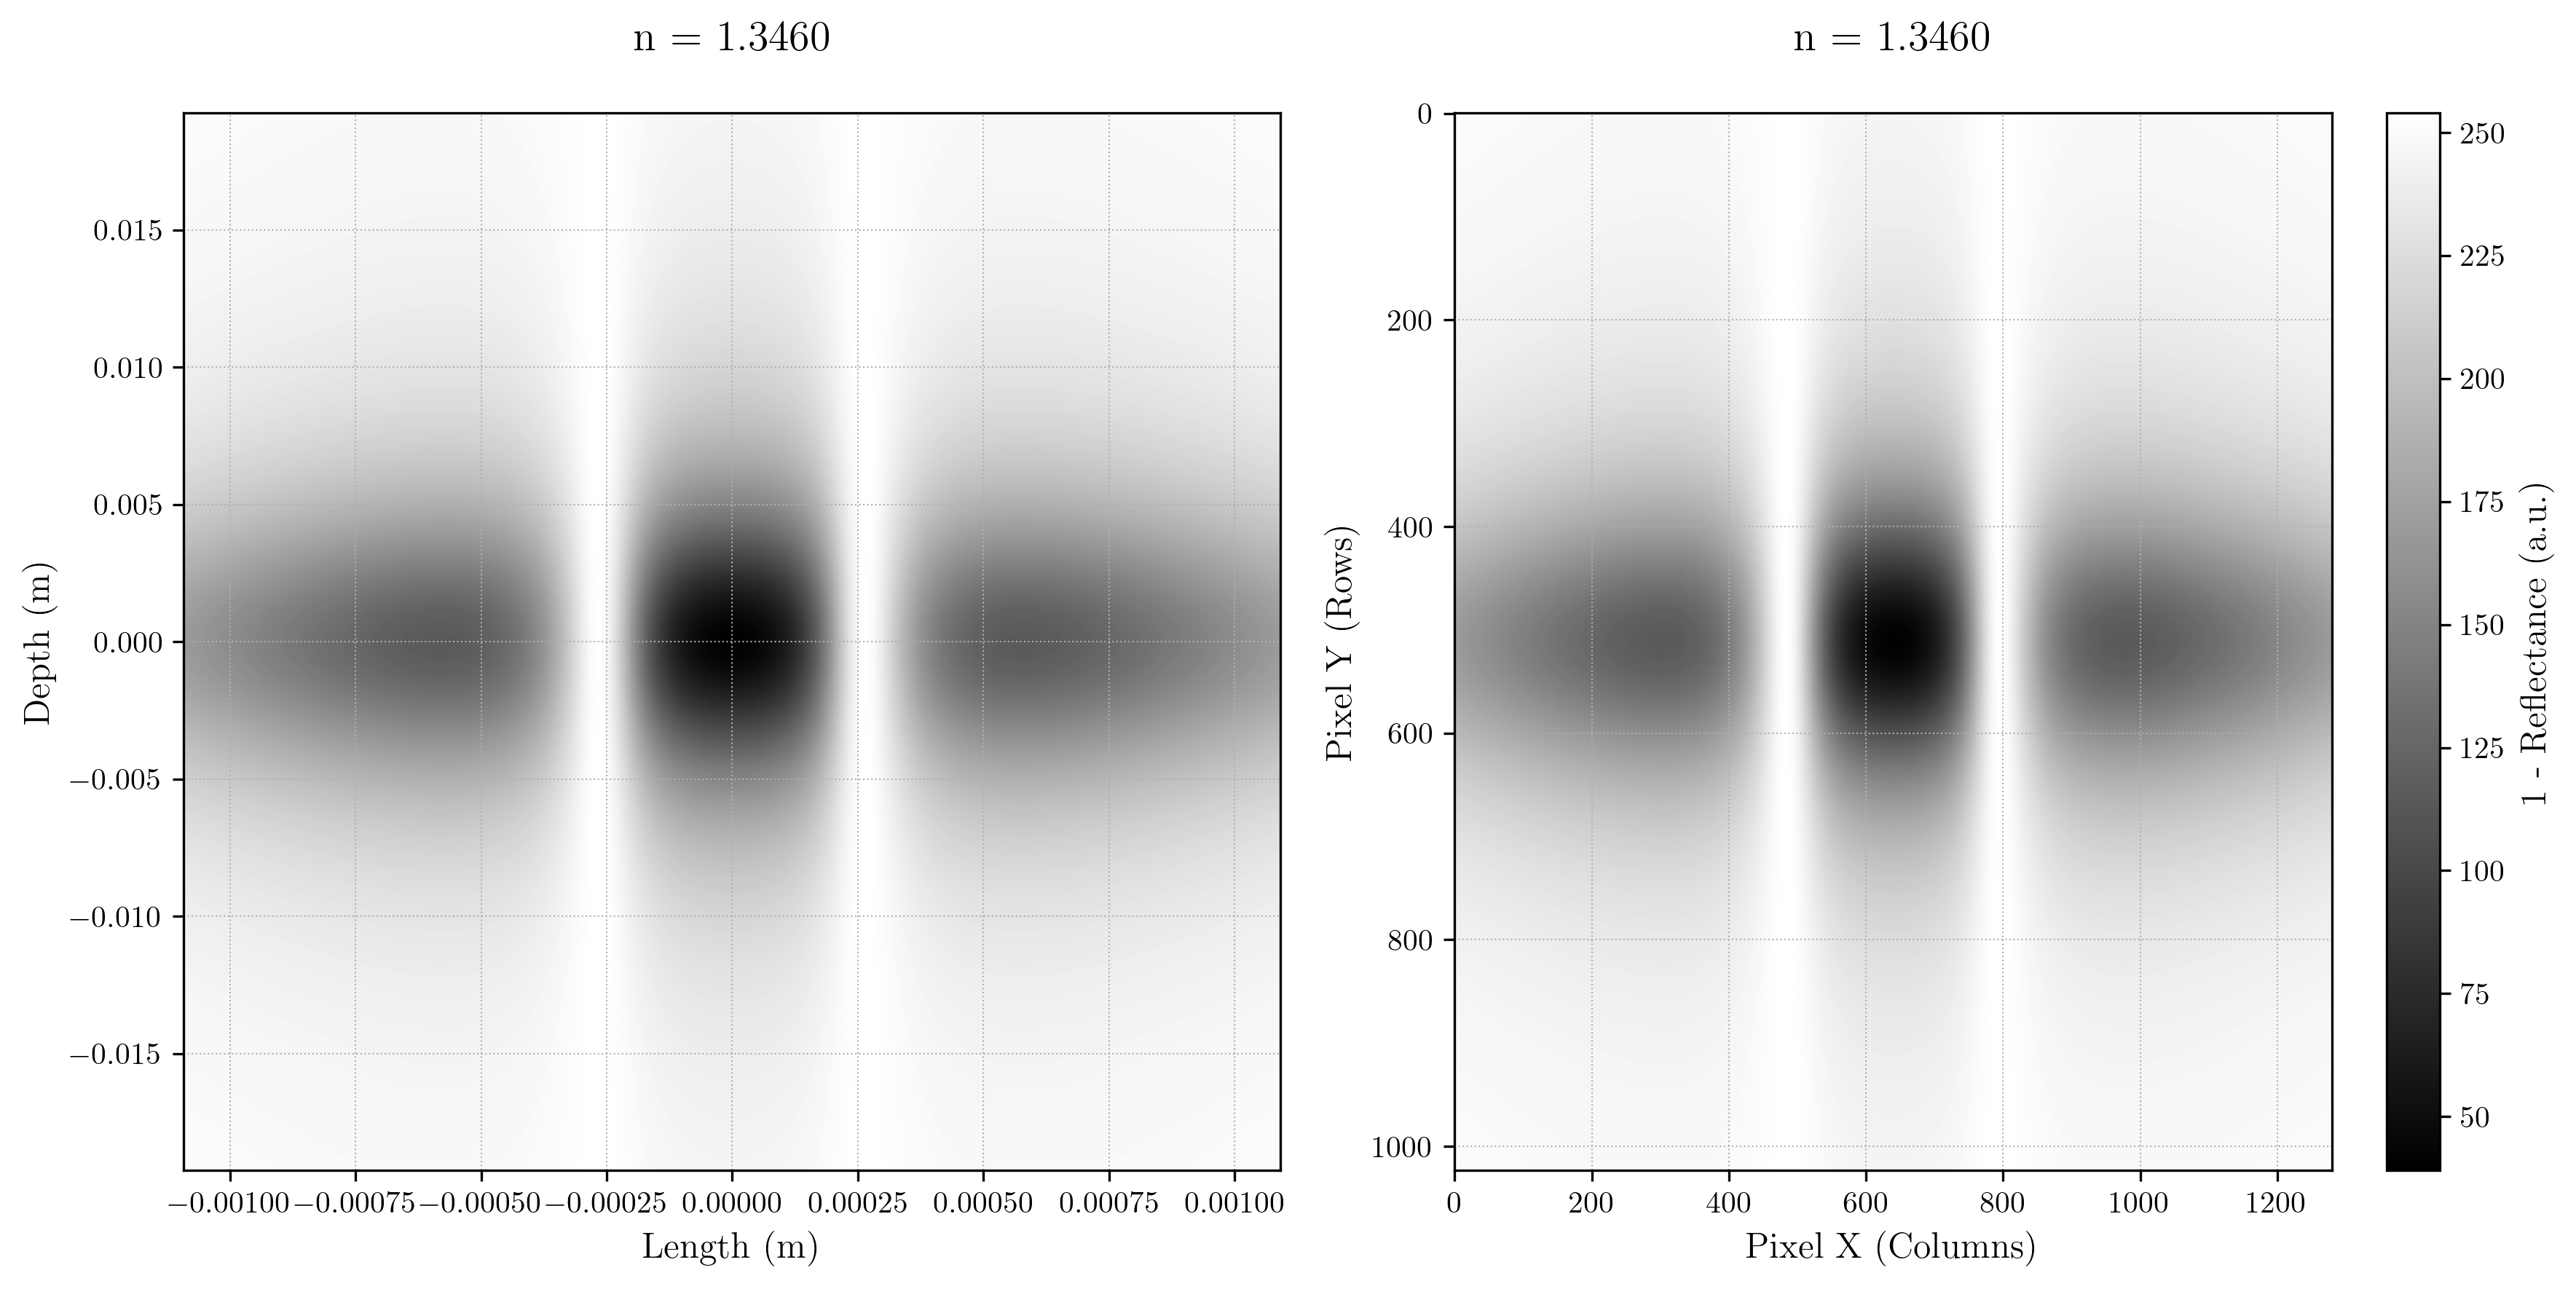

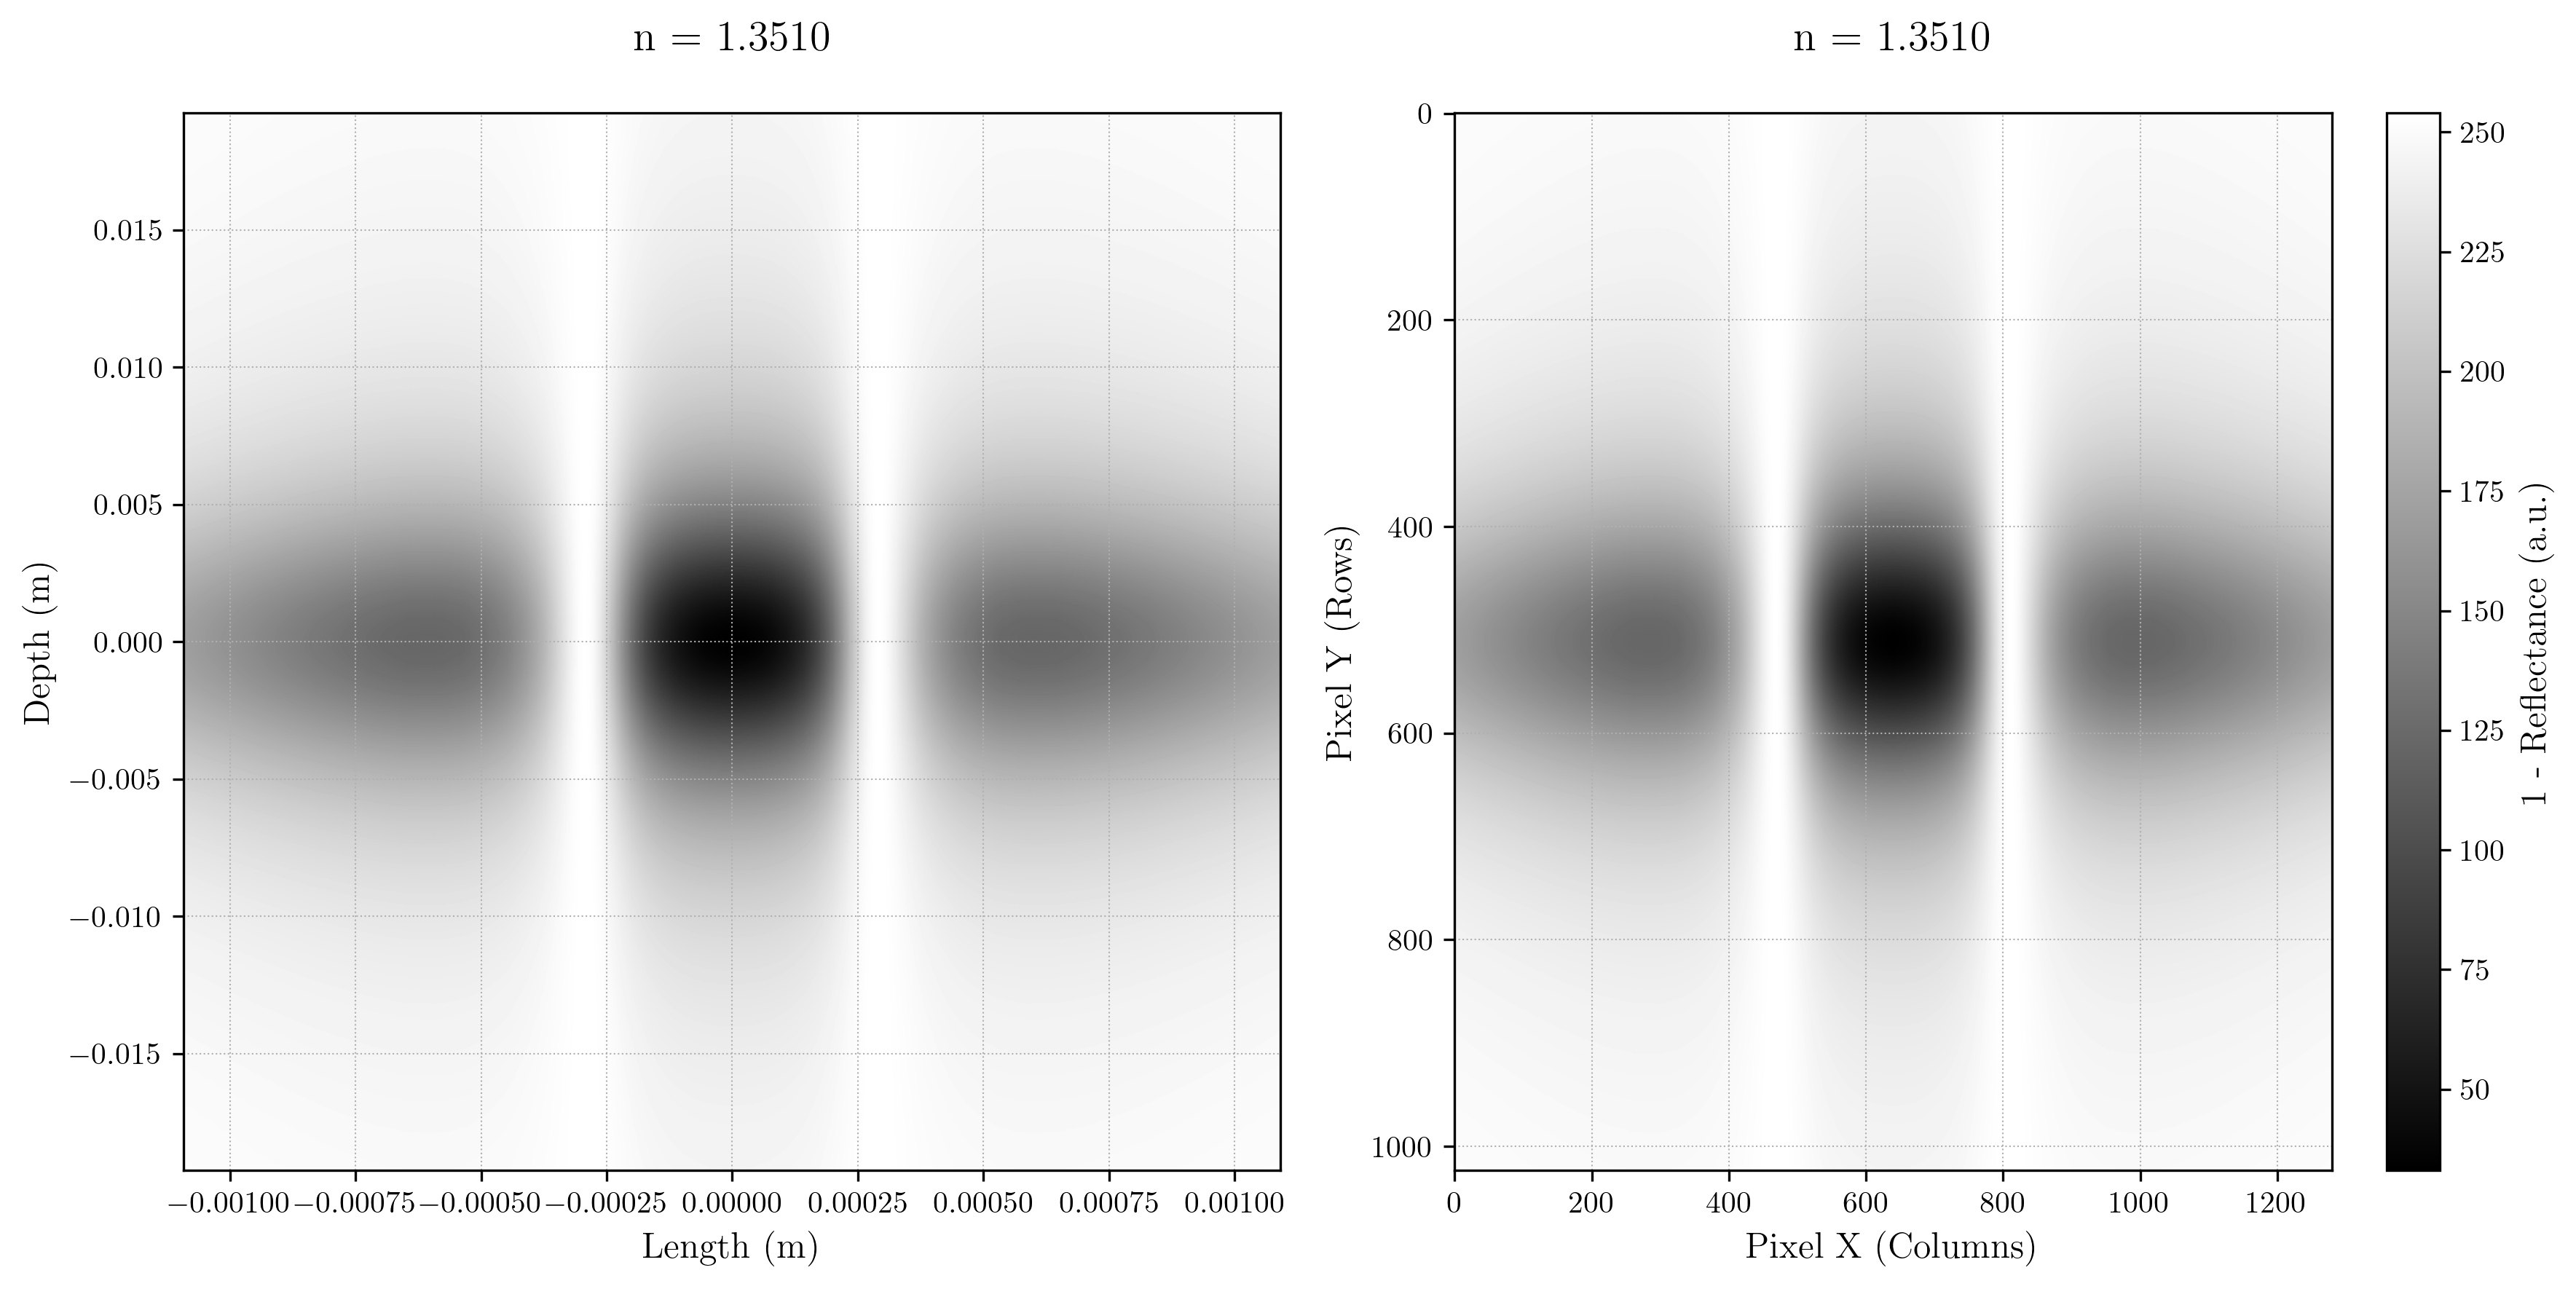

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
from scipy.interpolate import griddata

def create_spr_image(n, incidence_angle_m, intensity, mask, S, Y, img_shape=(1024, 1280)):
    # Compute reflectance for all valid points
    valid_mask = ~np.isnan(incidence_angle_m)
    valid_angles = np.deg2rad(incidence_angle_m[valid_mask])
    batched_compute_rp = jax.vmap(compute_rp, in_axes=(0, None, None, None, None, None, None, None))
    RP = np.array(batched_compute_rp(jnp.array(valid_angles), n0, n1, n, n3, d1, d2, la))

    # Create spatial coordinate grid
    xi = np.linspace(S.min(), S.max(), img_shape[1])
    yi = np.linspace(Y.min(), Y.max(), img_shape[0])
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate reflectance values to image grid
    points = np.column_stack((S.ravel(), Y.ravel()))
    values = RP.ravel()
    img_data = griddata(points[valid_mask.ravel()], values, (xi, yi), method='linear')

    # Apply intensity mask and normalize
    img_data *= intensity  # Modulate by beam intensity
    img_data = np.clip(img_data, 0, 1)

    # Invert for SPR dip visualization (dark = low reflectance)
    img_data = 1 - img_data

    # Convert to grayscale image
    grayscale = (img_data * 255).astype(np.uint8)
    
    return grayscale

RIndexes = [n3, n3 + 5e-3, n3 + 2 * 5e-3, n3 + 3 * 5e-3, n3 + 4 * 5e-3]
# Generate images for all refractive indices
for idx, n in enumerate(RIndexes):
    # Create SPR image
    spr_image = create_spr_image(n, incidence_angle_m, intensity, mask, S, Y)
    
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=300)
    
    # Subplot 1: Physical Coordinates (meters)
    im1 = ax1.imshow(spr_image, cmap='gray', aspect='auto', 
                    extent=[S.min(), S.max(), Y.min(), Y.max()])
    ax1.set_title(f'n = {np.real(n):.4f}\n')
    ax1.set_xlabel("Length (m)")
    ax1.set_ylabel("Depth (m)")
    
    # Subplot 2: Pixel Units
    im2 = ax2.imshow(spr_image, cmap='gray', aspect='auto')  # No extent parameter
    ax2.set_title(f'n = {np.real(n):.4f}\n')
    ax2.set_xlabel("Pixel X (Columns)")
    ax2.set_ylabel("Pixel Y (Rows)")
    
    # Add colorbars for both subplots
    # cbar1 = fig.colorbar(im1, ax=ax1, orientation='vertical')
    # cbar1.set_label('1 - Reflectance (a.u.)')
    cbar2 = fig.colorbar(im2, ax=ax2, orientation='vertical')
    cbar2.set_label('1 - Reflectance (a.u.)')

    plt.tight_layout()
    plt.show()

### 1.5.3 Electric Field distribution calculations

In [73]:
def getFields(n, mu, d, theta, lambda_):
    # Create null arrays
    M = np.zeros((2, 2, len(n)), dtype=complex)
    Mtot = np.identity(2, dtype=complex)

    epsilon = np.sqrt(n**2 - (np.real(n[0]) * np.sin(theta))**2)
    beta = 2 * np.pi / lambda_ * d * epsilon
    q = np.sqrt(mu) * epsilon / n**2

    # Set arrays
    for j in range(1, len(n) - 1):
        M[:, :, j] = [[np.cos(beta[j]), -1j / q[j] * np.sin(beta[j])],
                      [-1j * q[j] * np.sin(beta[j]), np.cos(beta[j])]]
        Mtot = np.matmul(Mtot, M[:, :, j])

    dem = (Mtot[0, 0] + Mtot[0, 1] * q[-1]) * q[0] + (Mtot[1, 0] + Mtot[1, 1] * q[-1])
    r = ((Mtot[0, 0] + Mtot[0, 1] * q[-1]) * q[0] - (Mtot[1, 0] + Mtot[1, 1] * q[-1])) / dem

    Z = np.cumsum(d) - d[0]
    z = np.linspace(Z[0], Z[1], 1000)
    j = 1
    Hy = (np.cos(2 * np.pi / lambda_ * (z - Z[j-1]) * epsilon[j]) * (1 + r) +
          1j / q[j] * np.sin(2 * np.pi / lambda_ * (z - Z[j-1]) * epsilon[j]) * q[0] * (1 - r))
    Ex = (-1j * q[j] * np.sin(2 * np.pi / lambda_ * (z - Z[j-1]) * epsilon[j]) * (1 + r) -
          np.cos(2 * np.pi / lambda_ * (z - Z[j-1]) * epsilon[j]) * q[0] * (1 - r))
    Ex = Ex / q[0]

    z = Z[1]
    j = 1
    P1 = np.array([[np.cos(2 * np.pi / lambda_ * (z - Z[j-1]) * epsilon[j]), 1j / q[j] * np.sin(2 * np.pi / lambda_ * (z - Z[j-1]) * epsilon[j])],
                   [1j * q[j] * np.sin(2 * np.pi / lambda_ * (z - Z[j-1]) * epsilon[j]), np.cos(2 * np.pi / lambda_ * (z - Z[j-1]) * epsilon[j])]])

    z = np.linspace(Z[1], Z[2], 1000)
    temp = np.matmul(P1, np.array([1 + r, q[0] * (1 - r)]))
    j = 2
    Ex_temp = (1j * q[j] * np.sin(2 * np.pi / lambda_ * (z - Z[j-1]) * epsilon[j]) * temp[0] +
               np.cos(2 * np.pi / lambda_ * (z - Z[j-1]) * epsilon[j]) * temp[1])
    Ex_temp = -Ex_temp / q[0]

    return Hy, Ex, Ex_temp, np.angle(Ex), np.angle(Ex_temp)

In [74]:
# Three layers parameters
ang = incidence_angle_m[:,0]

n = np.array([n0, n1, 1.3459])
d = np.array([500e-9, 50e-9, 500e-9])
mu = np.ones(len(n))
lambda_ = 670e-9;
# Plot results for θ = 70 degrees
theta1 = angres

Hy, Ex, Ex_temp, phase_Ex, phase_Ex_temp = getFields(n, mu, d, np.deg2rad(angres), lambda_)
depth_pos = np.where((np.abs(Ex_temp)**2/np.abs(Ex_temp[0])**2)<1/np.e)[0][0]
z1 = np.linspace(0, d[1], 1000)
z2 = np.linspace(d[1], d[2], 1000)

Text(0.5, 1.0, 'Field Intensity')

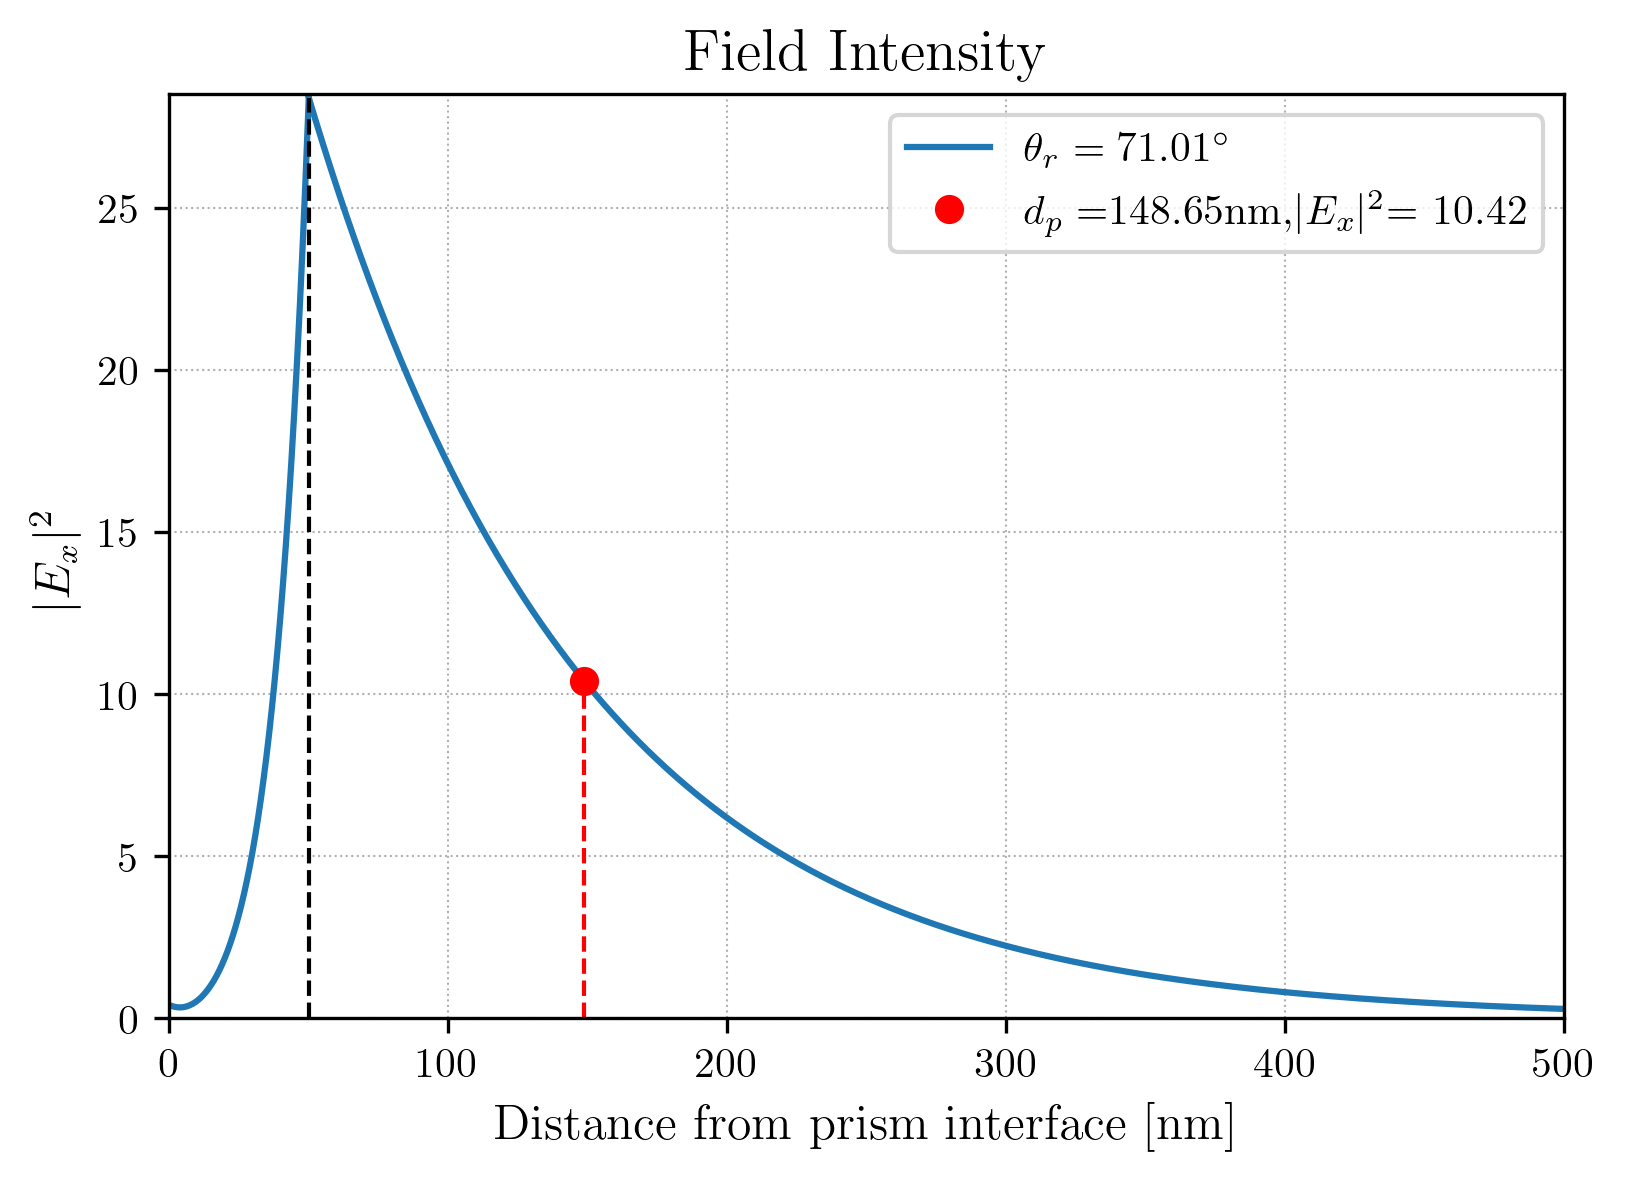

In [75]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 300)
ax.plot(1e9 * z1, np.abs(Ex)**2,color = '#1f77b4', label=r'$\theta_r = {:.2f}^\circ$'.format(theta1))
ax.plot(1e9 * z2, np.abs(Ex_temp)**2, color = '#1f77b4')
ax.plot(1e9 * np.array([d[1], d[1]]), [0, np.max(np.abs(Ex_temp)**2)], 'k--', linewidth=1.0)
ax.plot(np.array([1e9 * z2[depth_pos], 1e9 * z2[depth_pos]]), [0, np.abs(Ex_temp[depth_pos])**2], 'r--', linewidth=1.0)
ax.plot(1e9 * z2[depth_pos], np.abs(Ex_temp[depth_pos])**2,'ro', label = r'$d_p = $'+f'{1e9*z2[depth_pos]:.2f}nm'+ r',$|E_x|^2$= '+ f'{np.abs(Ex_temp[depth_pos])**2:.2f}')
ax.legend()
ax.set_xlabel('Distance from prism interface [nm]')
ax.set_xlim([0, 500])
ax.set_ylim([0,np.max(np.abs(Ex_temp)**2)+0.1])
ax.set_ylabel(r'$|E_x|^2$')
ax.set_title('Field Intensity')

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Combine z and field data from both layers
z_total = np.concatenate([z1, z2])  # z1 and z2 from your previous code
E_z = np.concatenate([Ex, Ex_temp])  # Ex and Ex_temp from getFields()

# Generate time data (adjust duration to show oscillations)
lambda_ = 670e-9  # Wavelength in vacuum
c = 3e8  # Speed of light
omega = 2 * np.pi * c / lambda_  # Angular frequency
t = np.linspace(0, 3 * 2*np.pi/omega, 100)  # Time for 3 oscillation periods

# Create meshgrid for animation
Z, T = np.meshgrid(z_total, t)
E_wave = np.real(E_z * np.exp(-1j * omega * T))  # Time-dependent field

# Set up figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), dpi=100)
fig.subplots_adjust(hspace=0.4)

# Pcolormesh to show time vs. z decay
pc = ax1.pcolormesh(1e9 * z_total, 1e15 * t, E_wave**2, shading='auto', cmap='RdBu', vmin=-np.max(np.abs(E_z)**2), vmax=np.max(np.abs(E_z)**2))
plt.colorbar(pc, ax=ax1, label='Electric Field [a.u.]')
ax1.set_title('Evanescent Decay Along Z')
ax1.set_xlabel('Distance from Prism Interface [nm]')
ax1.set_ylabel('Time [fs]')
time_indicator = ax1.axhline(1e15 * t[0], color='yellow', lw=1)  # Current time line

# Line plot for instantaneous field
line, = ax2.plot(1e9 * z_total, E_wave[0, :]**2, 'b-')
ax2.set_xlabel('Distance from Prism Interface [nm]')
ax2.set_ylabel('Electric Field [a.u.]')
ax2.set_ylim(np.min(E_wave**2), np.max(E_wave**2))
ax2.set_title('Field at Current Time')

# Animation update function
def update(frame):
    line.set_ydata(E_wave[frame, :]**2)  # Update line plot
    time_indicator.set_ydata([1e15 * t[frame]] * 2)  # 
    return line, time_indicator

# Create and save animation
ani = FuncAnimation(fig, update, frames=len(t), blit=True)
ani.save(
    'Animations/evanescent_wave_z.mp4',
    writer='ffmpeg',
    fps=30,
    dpi=100,  # Reduce DPI if resolution is too high
    bitrate=5000,  # Increase bitrate for better quality
    extra_args=['-crf', '18']  # Adjust compression (lower = better quality)
)

plt.close()

/home/toledorodrigo/miniconda3/envs/tfgpu/lib/python3.11/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [77]:
# from IPython.display import Video
# Video("Animations/evanescent_wave_z.mp4", embed=True)  # Display saved video in notebook

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Get data from your simulation
Hy, Ex, Ex_temp, phase_Ex, phase_Ex_temp = getFields(n, mu, d, np.deg2rad(angres), lambda_)
z_total = np.concatenate([z1, z2])  # z1 and z2 from previous code

# Wave parameters
lambda_ = 670e-9  # Wavelength in vacuum
c = 3e8  # Speed of light
omega = 2 * np.pi * c / lambda_  # Angular frequency
theta_rad = np.deg2rad(angres)  # Convert angle to radians

# Spatial grid in x and z
x = np.linspace(0, 5 * lambda_, 300)  # x-direction (propagation)
z = z_total  # z-direction (decay)
X, Z = np.meshgrid(x, z)  # Grid for x and z

# Time grid
t = np.linspace(0, 3 * 2 * np.pi / omega, 100)  # Time for 3 oscillations

# Wavevector component in x (using refractive index of the first layer)
k_x = (2 * np.pi * n[0] / lambda_) * np.sin(theta_rad)

# Precompute the spatial decay (E_z is your field along z)
E_z = np.concatenate([Ex, Ex_temp])  # Combine layers

# Initialize figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=150)
fig.subplots_adjust(wspace=0.3)

# Plot 1: X-Z plane wave animation
pc = ax1.pcolormesh(1e9 * x, 1e9 * z, np.zeros_like(X), cmap='RdBu', shading='auto', 
                    vmin=-np.max(np.abs(E_z)), vmax=np.max(np.abs(E_z)))
ax1.set_xlabel('x [nm]')
ax1.set_ylabel('z [nm]')
ax1.set_title('Evanescent Wave in X-Z Plane')
plt.colorbar(pc, ax=ax1, label='Electric Field [a.u.]')

# Plot 2: Intensity profile at a fixed x (e.g., x=0)
line, = ax2.plot(1e9 * z, np.abs(E_z)**2, 'b-', label='Intensity')
ax2.set_xlabel('z [nm]')
ax2.set_ylabel('$|E_x|^2$')
ax2.set_title('Decay Profile')
ax2.legend()

# Animation function
def update(frame):
    # Compute wave at current time: E(z) * cos(k_x x - ωt)
    wave = np.real(E_z[:, np.newaxis] * np.exp(1j * (k_x * x - omega * t[frame])))
    pc.set_array(wave.ravel())  # Update colormesh
    
    return pc, line

# Create and save animation
ani = FuncAnimation(fig, update, frames=len(t), blit=True)
ani.save(
    'Animations/evanescent_xz.mp4',
    writer='ffmpeg',
    fps=30,
    dpi=100,  # Reduce DPI if resolution is too high
    bitrate=5000,  # Increase bitrate for better quality
    extra_args=['-crf', '18']  # Adjust compression (lower = better quality)
)
plt.close()

In [79]:
# from IPython.display import Video
# Video("Animations/evanescent_xz.mp4", embed=True)  # Display saved video in notebook

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate wave data
x = np.linspace(0, 5*lambda_, 300)
t = np.linspace(0, 2e-15, 100)
omega = 2*np.pi*3e8/lambda_
theta_rad = np.deg2rad(angres)
k_x = (2*np.pi*n[0]/lambda_) * np.sin(theta_rad)

X, T = np.meshgrid(x, t)
E_wave = np.real(Ex_temp[depth_pos] * np.exp(1j*(k_x*X - omega*T)))

# Set up figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), dpi=100)
fig.subplots_adjust(hspace=0.4)

# Configure plots
pc = ax1.pcolormesh(1e9*X, 1e15*T, E_wave, shading='auto', cmap='RdBu')
plt.colorbar(pc, ax=ax1, label='Electric Field [a.u.]')
ax1.set_title(f'Wave Propagation at Depth {1e9*z2[depth_pos]:.1f} nm')
time_indicator = ax1.axhline(1e15*t[0], color='yellow', lw=1)

line, = ax2.plot(1e9*x, E_wave[0], 'b-')
ax2.set_ylim(E_wave.min(), E_wave.max())

# Animation function
def update(frame):
    line.set_ydata(E_wave[frame])
    time_indicator.set_ydata([1e15*t[frame]] * 2)
    return line, time_indicator

# Create and save animation
ani = FuncAnimation(fig, update, frames=len(t), blit=True)

# Save parameters
ani.save(
    'Animations/wave_animation.mp4',
    writer='ffmpeg',
    fps=30,
    dpi=100,  # Reduce DPI if resolution is too high
    bitrate=5000,  # Increase bitrate for better quality
    extra_args=['-crf', '18']  # Adjust compression (lower = better quality)
)

plt.close()  # Clean up memory

In [82]:
# from IPython.display import Video
# Video("Animations/wave_animation.mp4", embed=True)  # Display saved video in notebook